In [3210]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns

from matplotlib.ticker import MaxNLocator


In [3211]:
# Load the data
draft_data = pd.read_csv('/Users/HWAT/Downloads/Code/3162 Project/nhl_since_2003.csv')

In [3212]:
## To make it easier to find the player with more goals than assists, 
# consider sorting the data by the difference between goals and assists for each player. 
# New data to upload is '/Users/HWAT/Downloads/Code/3162 Project/nhldraft.csv'
import pandas as pd

# Load the data
player_draft_data = pd.read_csv('/Users/HWAT/Downloads/Code/3162 Project/nhldraft.csv')

# Display the first few rows of the dataframe
print(player_draft_data.head())

# Convert the 'draft_year' column to a datetime object
player_draft_data['year'] = pd.to_datetime(player_draft_data['year'], format='%Y')


   id  year  overall_pick                 team            player nationality  \
0   1  2022             1   Montreal Canadiens  Juraj Slafkovsky          SK   
1   2  2022             2    New Jersey Devils       Simon Nemec          SK   
2   3  2022             3      Arizona Coyotes      Logan Cooley          US   
3   4  2022             4       Seattle Kraken      Shane Wright          CA   
4   5  2022             5  Philadelphia Flyers   Cutter Gauthier          SE   

  position   age  to_year                           amateur_team  ...  points  \
0       LW  18.0      NaN                          TPS (Finland)  ...     NaN   
1        D  18.0      NaN                    HK Nitra (Slovakia)  ...     NaN   
2        C  18.0      NaN  USA U-18 Development Team (USDP/USHL)  ...     NaN   
3        C  18.0      NaN              Kingston Frontenacs (OHL)  ...     NaN   
4       LW  18.0      NaN  USA U-18 Development Team (USDP/USHL)  ...     NaN   

   plus_minus  penalties_minutes

In [3213]:
# I would like to sort the dataframe by the difference between goals and assists for each player for each season, 
# I would like to focus on players whose year of draft began after 2003
# First we need to convert the years into the split, just the beginning one
draft_data['season'] = draft_data['season'].str.split('-').str[0]

# Sort the dataframe by the difference between goals and assists for each player
player_data = draft_data[draft_data['season'] > '2003-01-01']
player_data = player_data.sort_values(by=['g', 'a'], ascending=False)
player_data = player_data.reset_index(drop=True)
# Print the ten players with the highest difference between goals and assists
print(player_data.head(10))

   Unnamed: 0          playername season position1 position2  \
0       18133     Auston Matthews   2023         C        LW   
1        3581  Alexander Ovechkin   2007        LW       NaN   
2       17155      Connor McDavid   2022         C        LW   
3       17157      David Pastrnak   2022        RW        LW   
4       16140     Auston Matthews   2021         C        LW   
5        7113      Steven Stamkos   2011         C         W   
6       18139        Sam Reinhart   2023         C        RW   
7        4440  Alexander Ovechkin   2008        LW       NaN   
8        1853   Jonathan Cheechoo   2005        RW       NaN   
9       16138      Leon Draisaitl   2021         C         W   

                  team  gp   g   a   tp   ppg  pim  +/-  \
0  Toronto Maple Leafs  81  69  38  107  1.32   20   31   
1  Washington Capitals  82  65  47  112  1.37   40   28   
2      Edmonton Oilers  82  64  89  153  1.87   36   22   
3        Boston Bruins  82  61  52  113  1.38   38   34   


In [3214]:
# Sort the dataframe by the difference between goals and assists for each player
# I would like to focus on players whose year of draft began after 2003
player_draft_data = player_draft_data[player_draft_data['year'] > '2003-01-01']
player_draft_data = player_draft_data.sort_values(by=['goals', 'assists'], ascending=False)
player_draft_data = player_draft_data.reset_index(drop=True)
# Print the ten players with the highest difference between goals and assists
print(player_draft_data.head(10))

     id       year  overall_pick                 team          player  \
0  3866 2004-01-01             1  Washington Capitals   Alex Ovechkin   
1  3636 2005-01-01             1  Pittsburgh Penguins   Sidney Crosby   
2  3001 2008-01-01             1  Tampa Bay Lightning  Steven Stamkos   
3  3867 2004-01-01             2  Pittsburgh Penguins   Evgeni Malkin   
4  3212 2007-01-01             1   Chicago Blackhawks    Patrick Kane   
5  3427 2006-01-01             5        Boston Bruins     Phil Kessel   
6  2791 2009-01-01             1   New York Islanders    John Tavares   
7  3646 2005-01-01            11    Los Angeles Kings    Anze Kopitar   
8  3425 2006-01-01             3   Chicago Blackhawks  Jonathan Toews   
9  3493 2006-01-01            71        Boston Bruins   Brad Marchand   

  nationality position   age  to_year                     amateur_team  ...  \
0          RU       LW  18.0   2022.0           Dynamo Moskva (Russia)  ...   
1          CA        C  18.0   2022.0 

In [3215]:
# Printing five more players with the highest difference between goals and assists
print(player_draft_data.iloc[10:20])

      id       year  overall_pick                 team              player  \
10  3340 2007-01-01           129         Dallas Stars          Jamie Benn   
11  3233 2007-01-01            22   Montreal Canadiens      Max Pacioretty   
12  2582 2010-01-01             2        Boston Bruins        Tyler Seguin   
13  2587 2010-01-01             7  Carolina Hurricanes        Jeff Skinner   
14  3870 2004-01-01             5      Phoenix Coyotes       Blake Wheeler   
15  3220 2007-01-01             9      San Jose Sharks       Logan Couture   
16  3668 2005-01-01            33         Dallas Stars          James Neal   
17  3444 2006-01-01            22  Philadelphia Flyers       Claude Giroux   
18  2793 2009-01-01             3   Colorado Avalanche        Matt Duchene   
19  3213 2007-01-01             2  Philadelphia Flyers  James van Riemsdyk   

   nationality position   age  to_year                           amateur_team  \
10          CA       LW  18.0   2022.0                      

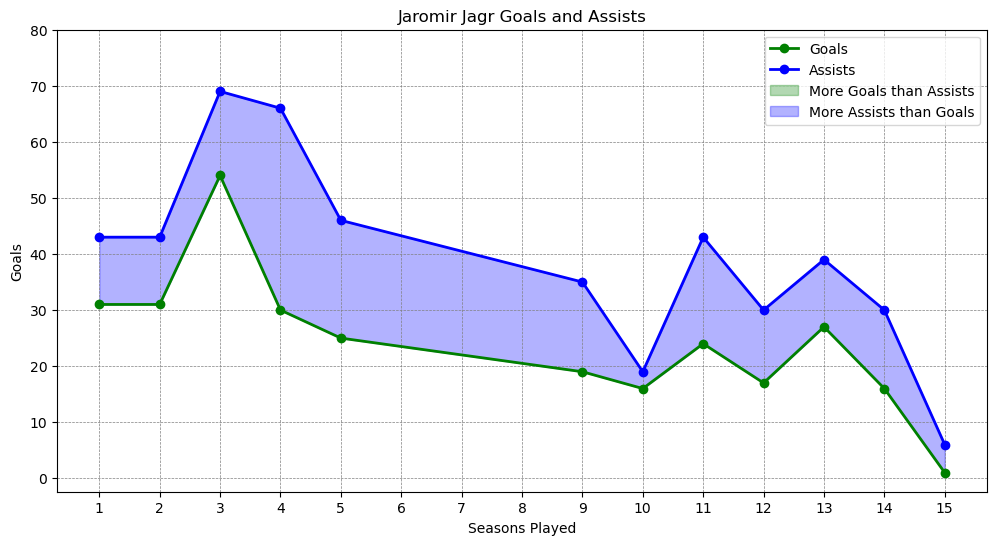

In [3216]:
# Plot the number of goals and assists for Jaromir Jagr over his career
jagr_goals = draft_data[draft_data['playername'] == 'Jaromir Jagr']['g']
jagr_assists = draft_data[draft_data['playername'] == 'Jaromir Jagr']['a']
jagr_seasons = draft_data[draft_data['playername'] == 'Jaromir Jagr']['season']
jagr_seasons = jagr_seasons.str.split('-').str[0].astype(int)
jagr_seasons = jagr_seasons - 2002
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(jagr_seasons, jagr_goals, 'g-o', label='Goals', linewidth=2)
ax.plot(jagr_seasons, jagr_assists, 'b-o', label='Assists', linewidth=2)
ax.fill_between(jagr_seasons, jagr_goals, jagr_assists, where=(jagr_goals > jagr_assists),
    interpolate=True, color='green', alpha=0.3, label='More Goals than Assists')
ax.fill_between(jagr_seasons, jagr_goals, jagr_assists, where=(jagr_goals <= jagr_assists),
    interpolate=True, color='blue', alpha=0.3, label='More Assists than Goals')
ax.set_xlabel('Seasons Played')
ax.set_ylabel('Goals')
ax.set_xticks(range(1, 16, 1))
ax.set_yticks(range(0,90,10))
ax.set_title('Jaromir Jagr Goals and Assists')
ax.legend(loc='upper right')
ax.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.show()

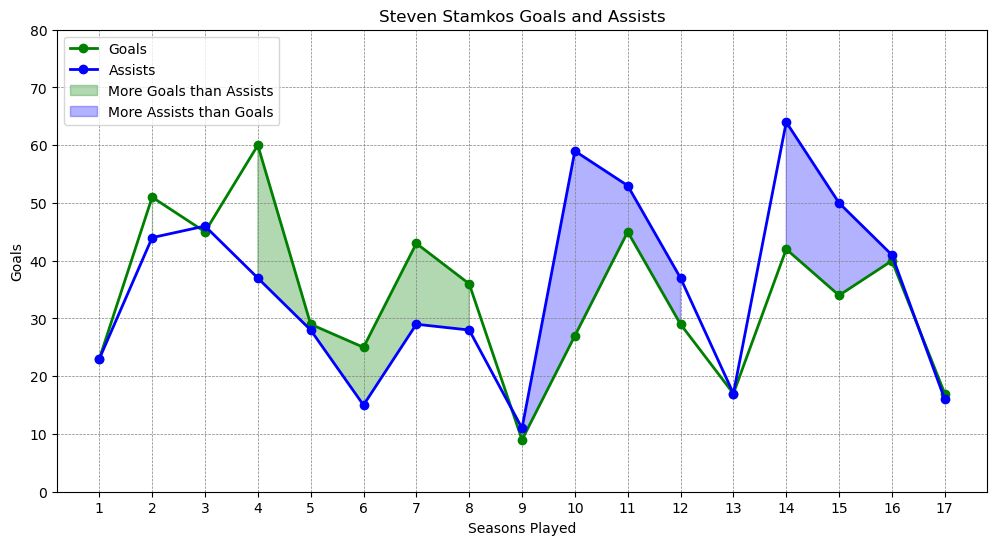

In [3217]:
# Same procedures as above, this time with Steven Stamkos
stamkos_goals = draft_data[draft_data['playername'] == 'Steven Stamkos']['g']
stamkos_assists = draft_data[draft_data['playername'] == 'Steven Stamkos']['a']
stamkos_seasons = draft_data[draft_data['playername'] == 'Steven Stamkos']['season']
stamkos_seasons = stamkos_seasons.str.split('-').str[0].astype(int)
stamkos_seasons = stamkos_seasons - 2007
# Creates new index values for the subset of 'draft_data'
stamkos_goals = stamkos_goals.reset_index(drop=True)
stamkos_assists = stamkos_assists.reset_index(drop=True)
stamkos_seasons = stamkos_seasons.reset_index(drop=True)
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(stamkos_seasons, stamkos_goals, 'g-o', label='Goals', linewidth=2)
ax.plot(stamkos_seasons, stamkos_assists, 'b-o', label='Assists', linewidth=2)
ax.fill_between(stamkos_seasons, stamkos_goals, stamkos_assists, where=(stamkos_goals > stamkos_assists)
                , color='green', alpha=0.3, label='More Goals than Assists')
ax.fill_between(stamkos_seasons, stamkos_goals, stamkos_assists, where=(stamkos_assists > stamkos_goals)
                , color='blue', alpha=0.3, label='More Assists than Goals')
ax.set_xticks(stamkos_seasons)
ax.set_xticklabels(stamkos_seasons)
ax.set_xlabel('Seasons Played')
ax.set_ylabel('Goals')
ax.set_title('Steven Stamkos Goals and Assists')
ax.legend(loc='upper left')
ax.grid(True, linestyle='--', linewidth=0.5, color='gray')
ax.set_yticks(range(0,90,10))
plt.show()

#### Lets consider the fact that Steven Stamkos has won two Stanley Cups in his career with the Tampa Bay Lightning. I will highlight those wins in the plot

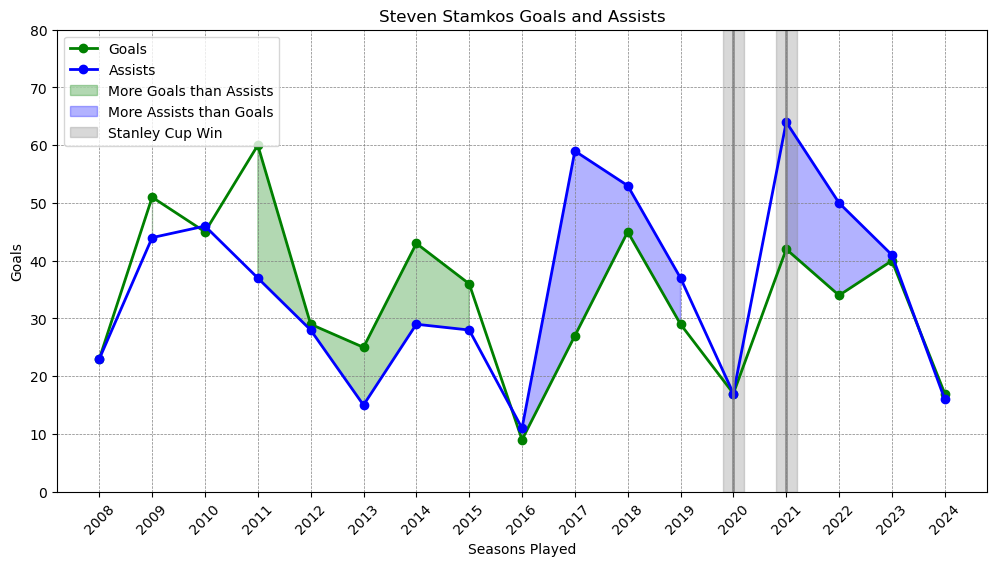

In [3218]:
# Same procedures as above, this time with Steven Stamkos
stamkos_goals = draft_data[draft_data['playername'] == 'Steven Stamkos']['g']
stamkos_assists = draft_data[draft_data['playername'] == 'Steven Stamkos']['a']
stamkos_seasons = draft_data[draft_data['playername'] == 'Steven Stamkos']['season']

# Creates new index values for the subset of 'draft_data'
stamkos_goals = stamkos_goals.reset_index(drop=True)
stamkos_assists = stamkos_assists.reset_index(drop=True)
stamkos_seasons = stamkos_seasons.reset_index(drop=True)
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(stamkos_seasons, stamkos_goals, 'g-o', label='Goals', linewidth=2)
ax.plot(stamkos_seasons, stamkos_assists, 'b-o', label='Assists', linewidth=2)
ax.fill_between(stamkos_seasons, stamkos_goals, stamkos_assists, where=(stamkos_goals > stamkos_assists)
                , color='green', alpha=0.3, label='More Goals than Assists')
ax.fill_between(stamkos_seasons, stamkos_goals, stamkos_assists, where=(stamkos_assists > stamkos_goals)
                , color='blue', alpha=0.3, label='More Assists than Goals')
ax.set_xticks(stamkos_seasons)
ax.set_xticklabels(stamkos_seasons, rotation=45)
# I want to highlight the 2020-21 season in light blue and 2021-22 season in light green 
# These are the two years where Stamkos won the Stanley Cup, but not mess with the graph
ax.axvspan(12 - 0.2, 12 + 0.2, color='gray', alpha=0.3, label='Stanley Cup Win')
ax.axvspan(13 - 0.2, 13 + 0.2, color='gray', alpha=0.3)
# Strong vertical line for precision
ax.axvline(x=12, color='gray', linestyle='-', linewidth=2, alpha=0.8)
ax.axvline(x=13, color='gray', linestyle='-', linewidth=2, alpha=0.8)
ax.legend(loc='upper left')
ax.grid(True, linestyle='--', linewidth=0.5, color='gray')
ax.set_title('Steven Stamkos Goals and Assists')
ax.set_xlabel('Seasons Played')
ax.set_ylabel('Goals')
ax.set_yticks(range(0,90,10))
plt.show()

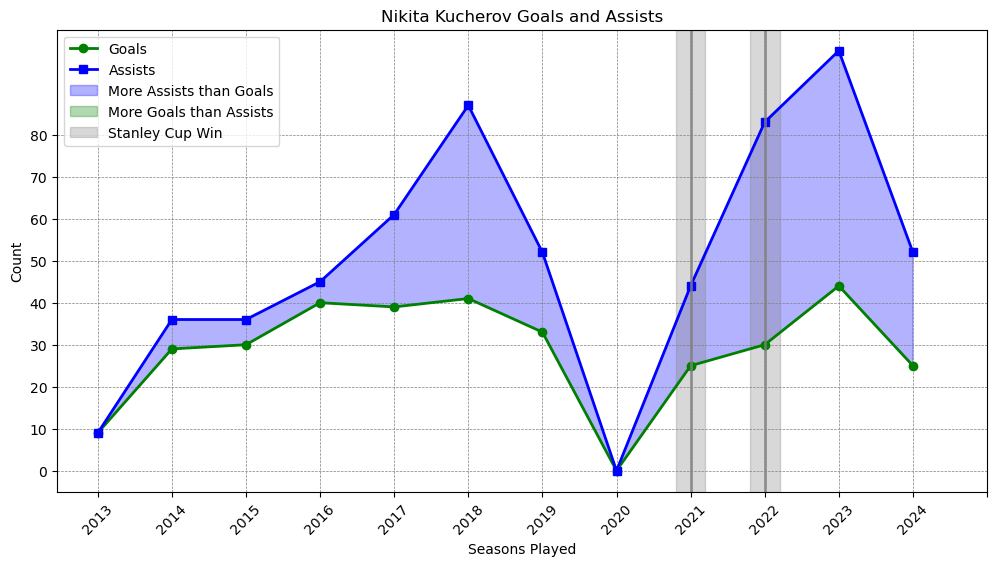

In [3219]:
# Nikita Kucherov goals and assists
kucherov_seasons = draft_data[draft_data['playername'] == 'Nikita Kucherov']['season']
kucherov_goals = draft_data[draft_data['playername'] == 'Nikita Kucherov']['g']
kucherov_assists = draft_data[draft_data['playername'] == 'Nikita Kucherov']['a']

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(kucherov_seasons, kucherov_goals, 'g-o', label='Goals', linewidth=2)    
ax.plot(kucherov_seasons, kucherov_assists, 'b-s', label='Assists', linewidth=2)
ax.fill_between(kucherov_seasons, kucherov_goals, kucherov_assists, where=(kucherov_goals < kucherov_assists),
                interpolate=True, color='blue', alpha=0.3, label='More Assists than Goals')
ax.fill_between(kucherov_seasons, kucherov_goals, kucherov_assists, where=(kucherov_goals > kucherov_assists),
                interpolate=True, color='green', alpha=0.3, label='More Goals than Assists')
# I want to highlight the 2020-21 season in light blue and 2021-22 season in light green 
# These are the two years where Stamkos won the Stanley Cup, but not mess with the graph
ax.axvspan(8 - 0.2, 8 + 0.2, color='gray', alpha=0.3, label='Stanley Cup Win')
ax.axvspan(9 - 0.2, 9 + 0.2, color='gray', alpha=0.3)
# Strong vertical line for precision
ax.axvline(x=8, color='gray', linestyle='-', linewidth=2, alpha=0.8)
ax.axvline(x=9, color='gray', linestyle='-', linewidth=2, alpha=0.8)
ax.set_xticks(kucherov_seasons)
ax.set_xticklabels(kucherov_seasons, rotation=45)
ax.set_title('Nikita Kucherov Goals and Assists')
ax.set_xlabel('Seasons Played')
ax.set_ylabel('Count')
ax.legend(loc = 'upper left')
ax.grid(True, linestyle='--', linewidth=0.5, color='gray')
ax.set_xticks(range(0, 13, 1))
ax.set_yticks(range(0, 90, 10))
plt.show()

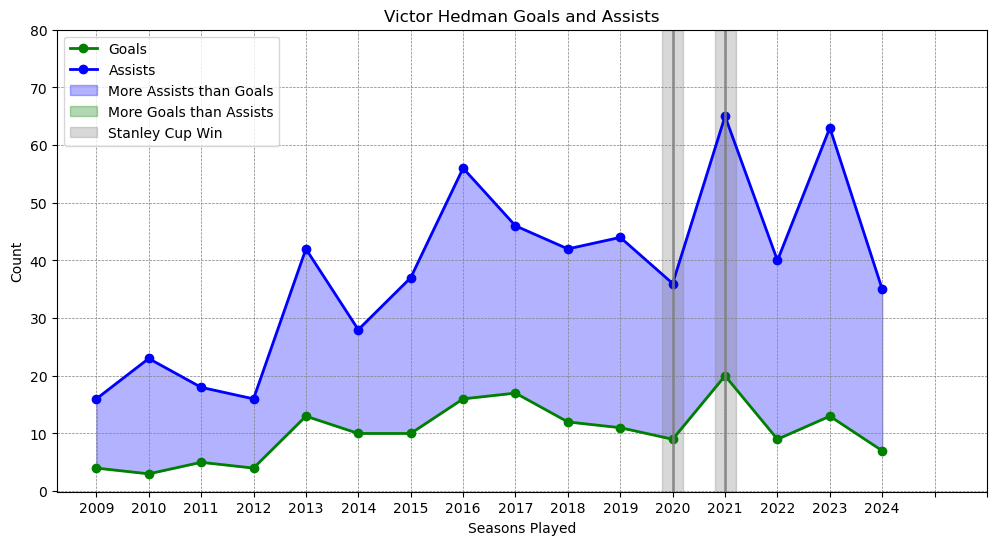

In [3220]:
# Viktor Hedman goals and assists
hedman_seasons = draft_data[draft_data['playername'] == 'Victor Hedman']['season']
hedman_goals = draft_data[draft_data['playername'] == 'Victor Hedman']['g']
hedman_assists = draft_data[draft_data['playername'] == 'Victor Hedman']['a']

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(hedman_seasons, hedman_goals, 'g-o', label='Goals', linewidth=2)
ax.plot(hedman_seasons, hedman_assists, 'b-o', label='Assists', linewidth=2)
ax.fill_between(hedman_seasons, hedman_goals, hedman_assists, where=(hedman_goals < hedman_assists),
                interpolate=True, color='blue', alpha=0.3, label='More Assists than Goals')
ax.fill_between(hedman_seasons, hedman_goals, hedman_assists, where=(hedman_goals > hedman_assists),
                interpolate=True, color='green', alpha=0.3, label='More Goals than Assists')
ax.axvspan(11 - 0.2, 11 + 0.2, color='gray', alpha=0.3)
ax.axvspan(12 - 0.2, 12 + 0.2, color='gray', alpha=0.3, label='Stanley Cup Win')
ax.axvline(x=11, color='gray', linestyle='-', linewidth=2, alpha=0.8)
ax.axvline(x=12, color='gray', linestyle='-', linewidth=2, alpha=0.8)

ax.set_title('Victor Hedman Goals and Assists')
ax.set_xlabel('Seasons Played')
ax.set_ylabel('Count')
ax.legend(loc='upper left')
ax.grid(True, linestyle='--', linewidth=0.5, color='gray')
ax.set_xticks(range(0, 18, 1))
ax.set_yticks(range(0, 90, 10))
plt.show()

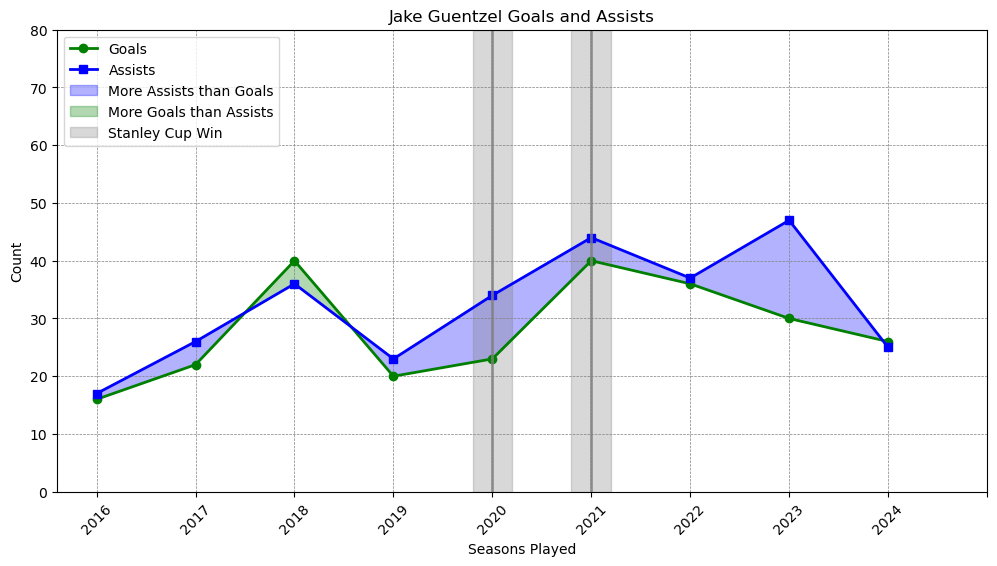

In [3221]:
# Jake Guentzel goals and assists
guentzel_seasons = draft_data[draft_data['playername'] == 'Jake Guentzel']['season']
guentzel_goals = draft_data[draft_data['playername'] == 'Jake Guentzel']['g']
guentzel_assists = draft_data[draft_data['playername'] == 'Jake Guentzel']['a']

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(guentzel_seasons, guentzel_goals, 'g-o', label='Goals', linewidth=2)    
ax.plot(guentzel_seasons, guentzel_assists, 'b-s', label='Assists', linewidth=2)
ax.fill_between(guentzel_seasons, guentzel_goals, guentzel_assists, where=(guentzel_goals < guentzel_assists),
                interpolate=True, color='blue', alpha=0.3, label='More Assists than Goals')
ax.fill_between(guentzel_seasons, guentzel_goals, guentzel_assists, where=(guentzel_goals > guentzel_assists),
                interpolate=True, color='green', alpha=0.3, label='More Goals than Assists')
ax.axvspan(4 - 0.2, 4 + 0.2, color='gray', alpha=0.3, label='Stanley Cup Win')
ax.axvspan(5 - 0.2, 5 + 0.2, color='gray', alpha=0.3)
# Strong vertical line for precision
ax.axvline(x=4, color='gray', linestyle='-', linewidth=2, alpha=0.8)
ax.axvline(x=5, color='gray', linestyle='-', linewidth=2, alpha=0.8)
ax.set_xticks(guentzel_seasons)
ax.set_xticklabels(guentzel_seasons, rotation=45)
ax.set_title('Jake Guentzel Goals and Assists')
ax.set_xlabel('Seasons Played')
ax.set_ylabel('Count')
ax.legend(loc = 'upper left')
ax.grid(True, linestyle='--', linewidth=0.5, color='gray')
ax.set_xticks(range(0, 10, 1))
ax.set_yticks(range(0, 90, 10))
plt.show()

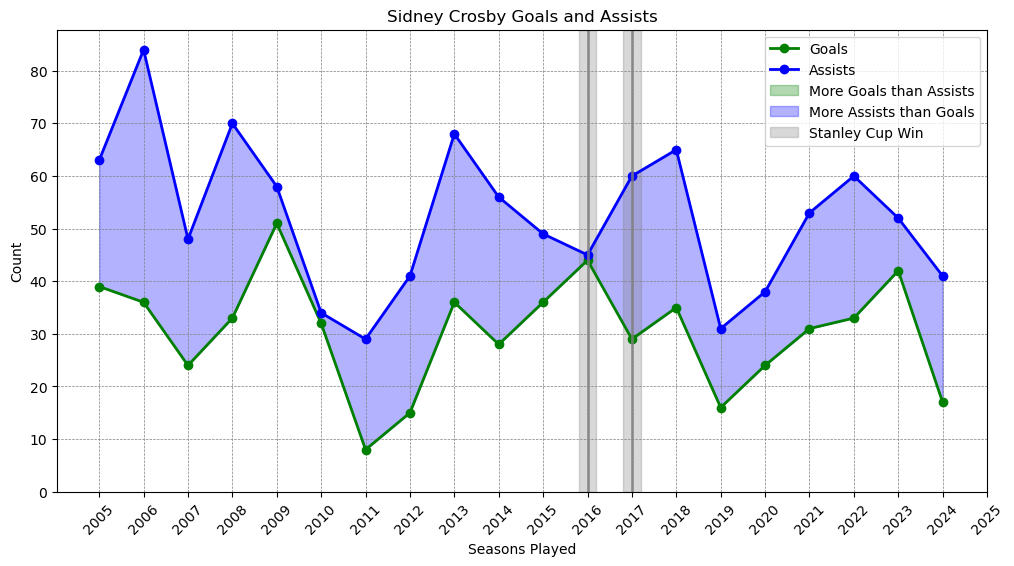

In [3222]:
# Same prodedure as above, this time with Sidney Crosby
crosby_goals = draft_data[draft_data['playername'] == 'Sidney Crosby']['g']
crosby_assists = draft_data[draft_data['playername'] == 'Sidney Crosby']['a']
crosby_seasons = draft_data[draft_data['playername'] == 'Sidney Crosby']['season']
# Create the first y-axis the plots goals against seasons
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(crosby_seasons, crosby_goals, 'g-o', label='Goals', linewidth=2)
ax.plot(crosby_seasons, crosby_assists, 'b-o', label='Assists', linewidth=2)
ax.fill_between(crosby_seasons, crosby_goals, crosby_assists, where=(crosby_goals > crosby_assists),
    interpolate=True, color='green', alpha=0.3, label='More Goals than Assists')
ax.fill_between(crosby_seasons, crosby_goals, crosby_assists, where=(crosby_goals <= crosby_assists),
    interpolate=True, color='blue', alpha=0.3, label='More Assists than Goals')
ax.set_xlabel('Seasons Played')
ax.set_ylabel('Count')
ax.set_title('Sidney Crosby Goals and Assists')
ax.grid(True, linestyle='--', linewidth=0.5, color='gray')
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
ax.axvspan(11 - 0.2, 11 + 0.2, color='gray', alpha=0.3, label='Stanley Cup Win')
ax.axvspan(12 - 0.2, 12 + 0.2, color='gray', alpha=0.3)
ax.axvline(x=11, color='gray', linestyle='-', linewidth=2, alpha=0.8)
ax.axvline(x=12, color='gray', linestyle='-', linewidth=2, alpha=0.8)
ax.set_xticks(range(0, 21, 1))
ax.set_xticklabels(range(2005, 2026, 1), rotation=45)
ax.set_yticks(range(0, 90, 10))
ax.legend(loc='upper right')
plt.show()

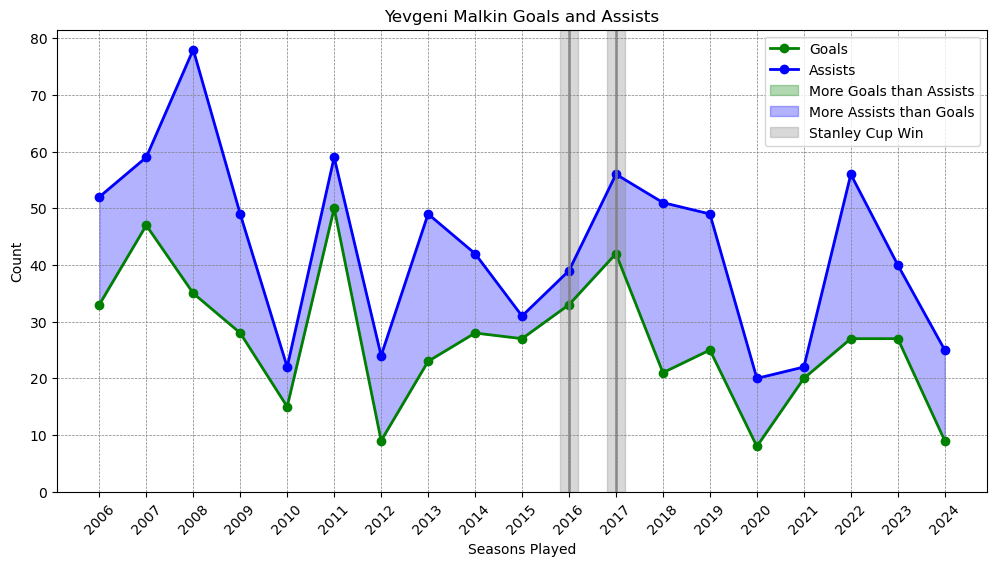

In [3223]:
# Evgeni Malkin
malkin_goals = draft_data[draft_data['playername'] == 'Yevgeni Malkin']['g']
malkin_assists = draft_data[draft_data['playername'] == 'Yevgeni Malkin']['a']
malkin_seasons = draft_data[draft_data['playername'] == 'Yevgeni Malkin']['season']
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(malkin_seasons, malkin_goals, 'g-o', label='Goals', linewidth=2)
ax.plot(malkin_seasons, malkin_assists, 'b-o', label='Assists', linewidth=2)
ax.fill_between(malkin_seasons, malkin_goals, malkin_assists, where=(malkin_goals > malkin_assists),
    interpolate=True, color='green', alpha=0.3, label='More Goals than Assists')
ax.fill_between(malkin_seasons, malkin_goals, malkin_assists, where=(malkin_assists > malkin_goals),
    interpolate=True, color='blue', alpha=0.3, label='More Assists than Goals')
ax.axvspan(10 - 0.2, 10 + 0.2, color='gray', alpha=0.3, label='Stanley Cup Win')
ax.axvspan(11 - 0.2, 11 + 0.2, color='gray', alpha=0.3)
ax.axvline(x=10, color='gray', linestyle='-', linewidth=2, alpha=0.8)
ax.axvline(x=11, color='gray', linestyle='-', linewidth=2, alpha=0.8)
ax.set_xlabel('Seasons Played')
ax.set_ylabel('Count')
ax.set_title('Yevgeni Malkin Goals and Assists')
ax.legend(loc='upper right')
ax.grid(True, linestyle='--', linewidth=0.5, color='gray')
ax.set_xticks(malkin_seasons)
ax.set_xticklabels(malkin_seasons, rotation=45)
ax.set_yticks(range(0, 90, 10))
plt.show()

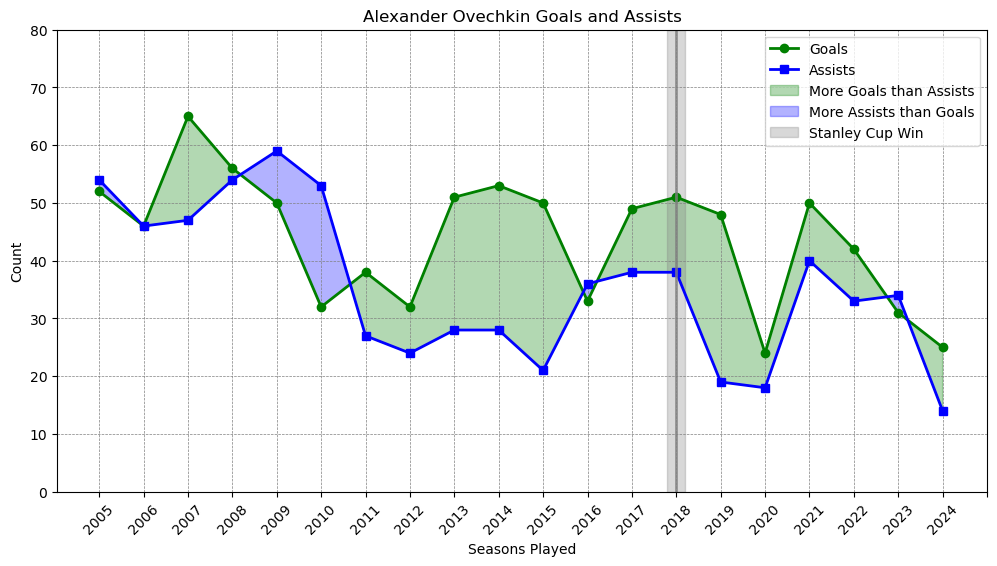

In [3224]:
ovie_seasons = draft_data[draft_data['playername'] == 'Alexander Ovechkin']['season']
ovie_goals = draft_data[draft_data['playername'] == 'Alexander Ovechkin']['g']
ovie_assists = draft_data[draft_data['playername'] == 'Alexander Ovechkin']['a']

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(ovie_seasons, ovie_goals, 'g-o', label='Goals', linewidth=2)
ax.plot(ovie_seasons, ovie_assists, 'b-s', label='Assists', linewidth=2)
ax.fill_between(ovie_seasons, ovie_goals, ovie_assists, where=(ovie_goals > ovie_assists), 
                interpolate=True, color='green', alpha=0.3, label='More Goals than Assists')
ax.fill_between(ovie_seasons, ovie_goals, ovie_assists, where=(ovie_assists > ovie_goals), 
                interpolate=True, color='blue', alpha=0.3, label='More Assists than Goals')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.axvspan(13-0.2, 13+0.2, color='gray', alpha=0.3, label='Stanley Cup Win')
ax.axvline(x=13, color='gray', linestyle='-', linewidth=2, alpha=0.8)
ax.set_xlabel('Seasons Played')
ax.set_ylabel('Count')
ax.legend(loc='upper right')
ax.set_title('Alexander Ovechkin Goals and Assists')
ax.set_xticks(ovie_seasons)
ax.set_xticklabels(ovie_seasons, rotation=45)
ax.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.xticks(range(0, 21, 1))
plt.yticks(range(0,90, 10))

plt.show()

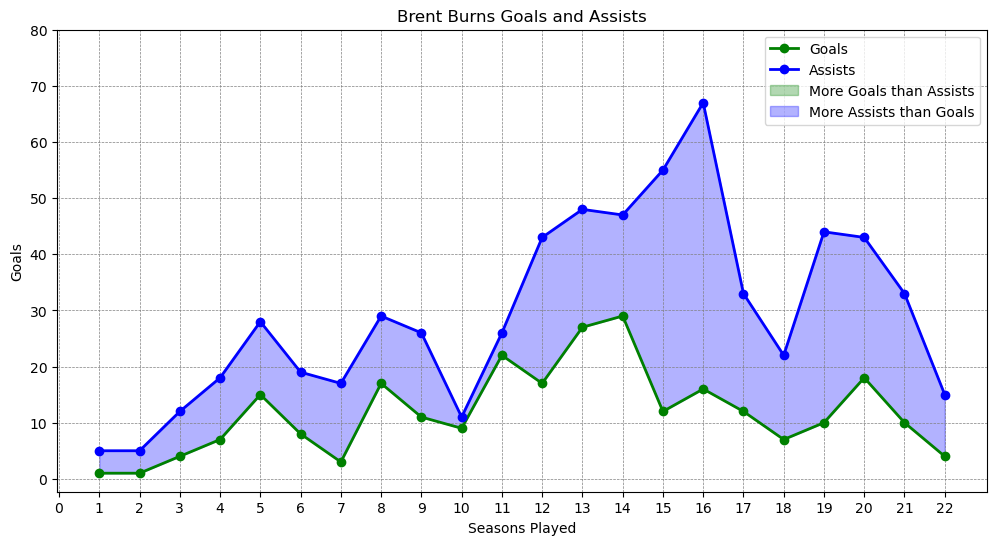

In [3225]:
# Creating a plot the same as above to demonstrate a defensemans 
# points, goals and assists over his career
burnzie_goals = draft_data[draft_data['playername']== 'Brent Burns']['g']
burnzie_assists = draft_data[draft_data['playername']== 'Brent Burns']['a']
burnzie_seasons = draft_data[draft_data['playername']== 'Brent Burns']['season']
burnzie_seasons = burnzie_seasons.str.split('-').str[0].astype(int)
burnzie_seasons = burnzie_seasons - 2002

# Create new index values for the subsets, dataframes of 'draft_data'
burnzie_goals = burnzie_goals.reset_index(drop=True)
burnzie_assists = burnzie_assists.reset_index(drop=True)
burnzie_seasons = burnzie_seasons.reset_index(drop=True)

#Create the first y-axis plots for goals against seasons
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(burnzie_seasons, burnzie_goals, 'g-o', label='Goals', linewidth=2)
ax.plot(burnzie_seasons, burnzie_assists, 'b-o', label='Assists', linewidth=2)
ax.fill_between(burnzie_seasons, burnzie_goals, burnzie_assists, where=(burnzie_goals > burnzie_assists),
    interpolate=True, color='green', alpha=0.3, label='More Goals than Assists')
ax.fill_between(burnzie_seasons, burnzie_goals, burnzie_assists, where=(burnzie_assists > burnzie_goals),
    interpolate=True, color='blue', alpha=0.3, label='More Assists than Goals')
ax.set_xlabel('Seasons Played')
ax.set_ylabel('Goals')
#loc='upper left' places the legend in the upper left corner of the plot.
#You can adjust the location as needed.
ax.legend(loc='upper right')
ax.grid(True,  linestyle='--', linewidth=0.5, color='gray')
ax.set_xticks(range(0, 23, 1))
ax.set_yticks(range(0, 90, 10))

# Add a title
plt.title('Brent Burns Goals and Assists')
plt.show()

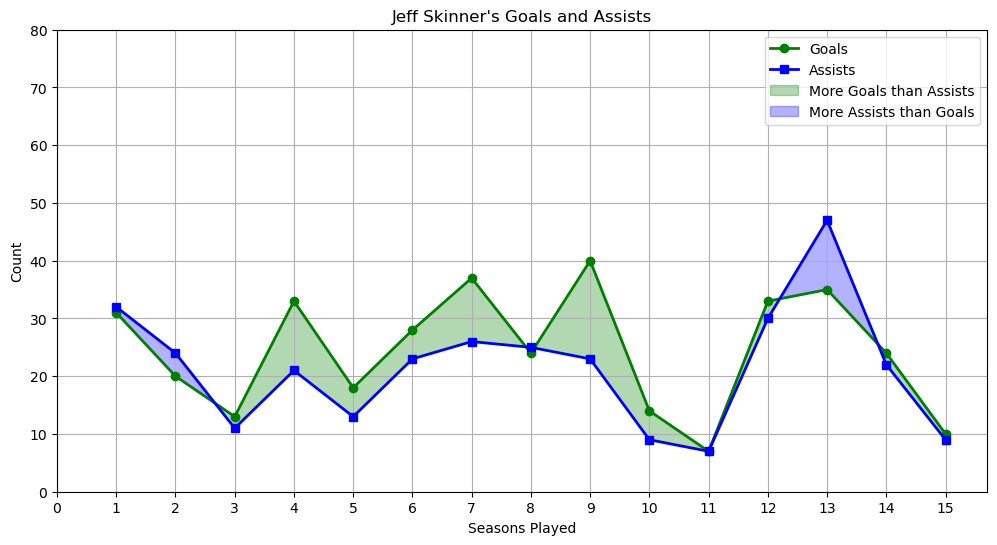

In [3226]:
skinner_goals = draft_data[draft_data['playername']== 'Jeff Skinner']['g']
skinner_assists = draft_data[draft_data['playername']== 'Jeff Skinner']['a']
skinner_seasons = draft_data[draft_data['playername']== 'Jeff Skinner']['season']
skinner_seasons = skinner_seasons.str.split('-').str[0].astype(int) - 2009
skinner_goals = skinner_goals.reset_index(drop=True)
skinner_assists = skinner_assists.reset_index(drop=True)
skinner_seasons = skinner_seasons.reset_index(drop=True)

fig, ax = plt.subplots(figsize=(12, 6))  # Create a figure and an axes.
ax.plot(skinner_seasons, skinner_goals, 'g-o', label='Goals', linewidth=2)  # Plot some data on the axes.
ax.plot(skinner_seasons, skinner_assists, 'b-s', label='Assists', linewidth=2)
ax.fill_between(skinner_seasons, skinner_goals, skinner_assists, where=(skinner_goals > skinner_assists),
                interpolate=True, color='green', alpha=0.3, label='More Goals than Assists')
ax.fill_between(skinner_seasons, skinner_goals, skinner_assists, where=(skinner_goals < skinner_assists),
                interpolate=True, color='blue', alpha=0.3, label='More Assists than Goals')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

ax.set_xlabel('Seasons Played')  # Add an x-label to the axes.
ax.set_ylabel('Count')  # Add a y-label to the axes.
ax.set_title("Jeff Skinner's Goals and Assists")  # Add a title to the axes.
plt.xticks(range(0, 16, 1))
plt.yticks(range(0,90, 10))
ax.legend()  # Add a legend.
ax.grid(True)
plt.show()

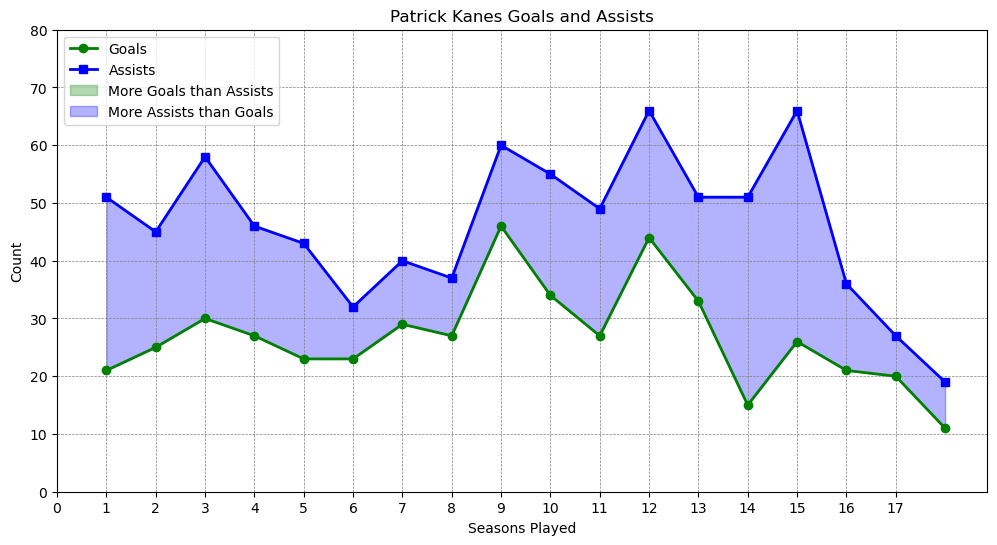

In [3227]:
# Patrick Kane's goals and assists
kane_goals = draft_data[draft_data['playername'] == 'Patrick Kane']['g']
kane_assists = draft_data[draft_data['playername'] == 'Patrick Kane']['a']
kane_seasons = draft_data[draft_data['playername'] == 'Patrick Kane']['season']
kane_seasons = kane_seasons.str.split('-').str[0].astype(int) - 2006

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(kane_seasons, kane_goals, 'g-o', label='Goals', linewidth=2)
ax.plot(kane_seasons, kane_assists, 'b-s', label='Assists', linewidth=2)
ax.fill_between(kane_seasons, kane_goals, kane_assists, where=(kane_goals > kane_assists),
                interpolate=True, color='green', alpha=0.3, label='More Goals than Assists')
ax.fill_between(kane_seasons, kane_goals, kane_assists, where=(kane_goals < kane_assists),
                interpolate=True, color='blue', alpha=0.3, label='More Assists than Goals')
ax.set_xlabel('Seasons Played')
ax.set_ylabel('Count')
ax.set_title('Patrick Kanes Goals and Assists')
ax.grid(True, linestyle='--', linewidth=0.5, color='gray')
ax.legend(loc = 'upper left')
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.xticks(range(0, 18, 1))
plt.yticks(range(0, 90, 10))
plt.show()

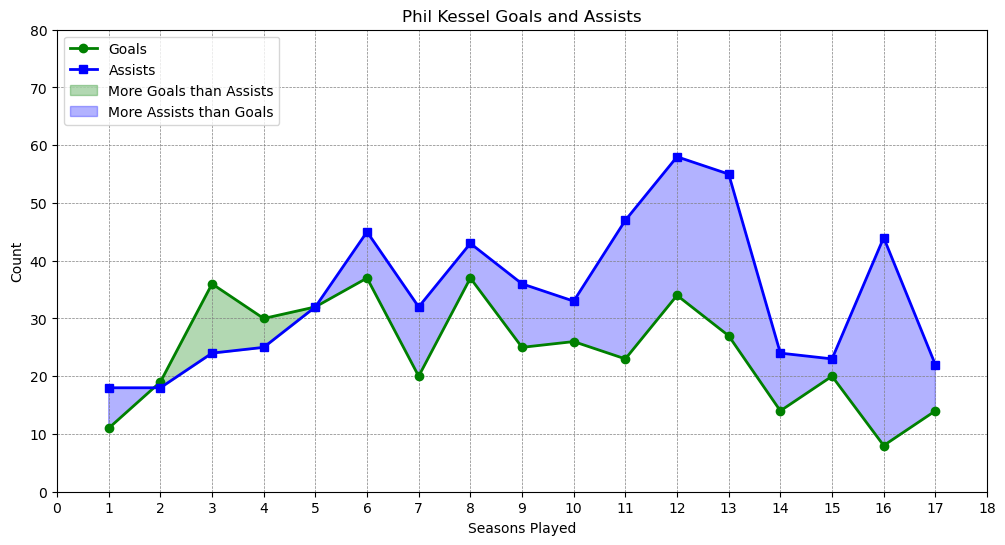

In [3228]:
# Phil Kessel's goals and assists
kessel_goals = draft_data[draft_data['playername'] == 'Phil Kessel']['g']
kessel_assists = draft_data[draft_data['playername'] == 'Phil Kessel']['a']
kessel_seasons = draft_data[draft_data['playername'] == 'Phil Kessel']['season']
kessel_seasons = kessel_seasons.str.split('-').str[0].astype(int) - 2005

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(kessel_seasons, kessel_goals, 'g-o', label='Goals', linewidth=2)
ax.plot(kessel_seasons, kessel_assists, 'b-s', label='Assists', linewidth=2)
ax.fill_between(kessel_seasons, kessel_goals, kessel_assists, where=(kessel_goals > kessel_assists),
                interpolate=True, color='green', alpha=0.3, label='More Goals than Assists')
ax.fill_between(kessel_seasons, kessel_goals, kessel_assists, where=(kessel_goals < kessel_assists),
                interpolate=True, color='blue', alpha=0.3, label='More Assists than Goals')
ax.set_xlabel('Seasons Played')
ax.set_ylabel('Count')  
ax.set_title('Phil Kessel Goals and Assists')
ax.legend(loc = 'upper left')
ax.grid(True, linestyle='--', linewidth=0.5, color='gray')
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.xticks(range(0, 19, 1))
plt.yticks(range(0, 90, 10))
plt.show()

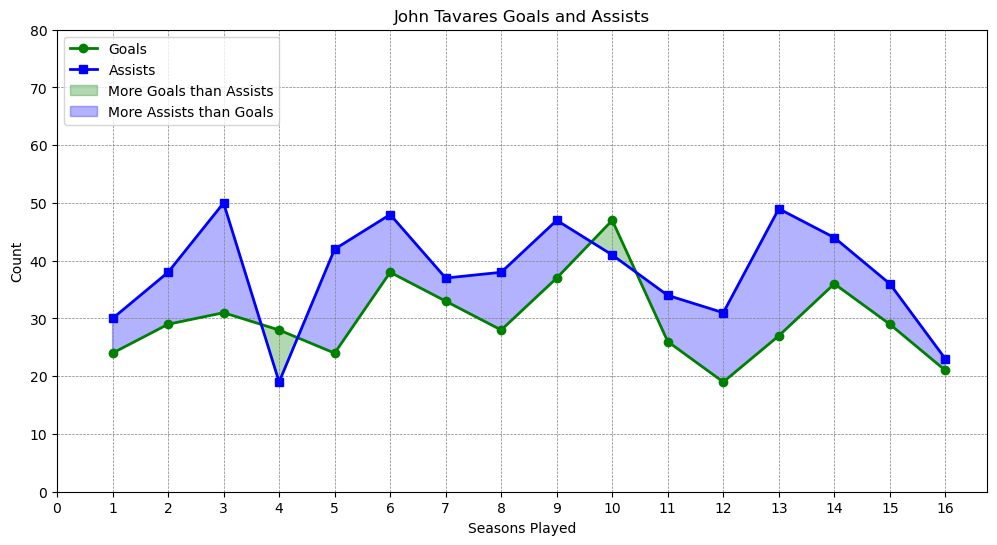

In [3229]:
# John Tavares' goals and assists
tavares_goals = draft_data[draft_data['playername'] == 'John Tavares']['g']
tavares_assists = draft_data[draft_data['playername'] == 'John Tavares']['a']
tavares_seasons = draft_data[draft_data['playername'] == 'John Tavares']['season']
tavares_seasons = tavares_seasons.str.split('-').str[0].astype(int) - 2008

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(tavares_seasons, tavares_goals, 'g-o', label='Goals', linewidth=2)
ax.plot(tavares_seasons, tavares_assists, 'b-s', label='Assists', linewidth=2)
ax.fill_between(tavares_seasons, tavares_goals, tavares_assists, where=(tavares_goals > tavares_assists),
                interpolate=True, color='green', alpha=0.3, label='More Goals than Assists')
ax.fill_between(tavares_seasons, tavares_goals, tavares_assists, where=(tavares_goals < tavares_assists),
                interpolate=True, color='blue', alpha=0.3, label='More Assists than Goals')
ax.set_title('John Tavares Goals and Assists')
ax.set_xlabel('Seasons Played')
ax.set_ylabel('Count')
ax.legend(loc = 'upper left')
ax.grid(True, linestyle='--', linewidth=0.5, color='gray')
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.xticks(range(0, 17, 1))
plt.yticks(range(0, 90, 10))
plt.show()

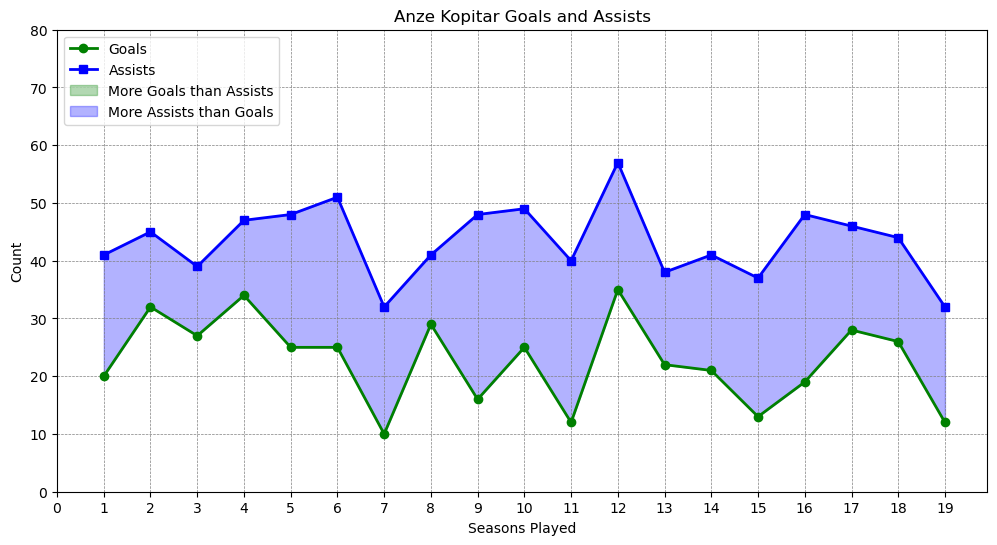

In [3230]:
# Anze Kopitar's goals and assists
kopitar_goals = draft_data[draft_data['playername'] == 'Anze Kopitar']['g']
kopitar_assists = draft_data[draft_data['playername'] == 'Anze Kopitar']['a']
kopitar_seasons = draft_data[draft_data['playername'] == 'Anze Kopitar']['season']
kopitar_seasons = kopitar_seasons.str.split('-').str[0].astype(int) - 2005
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(kopitar_seasons, kopitar_goals, 'g-o', linewidth=2, label='Goals')
ax.plot(kopitar_seasons, kopitar_assists, 'b-s',linewidth=2, label='Assists')
ax.fill_between(kopitar_seasons, kopitar_goals, kopitar_assists, where=(kopitar_goals > kopitar_assists),
                interpolate=True, color='green', alpha=0.3, label='More Goals than Assists')
ax.fill_between(kopitar_seasons, kopitar_goals, kopitar_assists, where=(kopitar_goals < kopitar_assists),
                interpolate=True, color='blue', alpha=0.3, label='More Assists than Goals')
ax.set_title('Anze Kopitar Goals and Assists')
ax.set_xlabel('Seasons Played')
ax.set_ylabel('Count')
ax.legend(loc = 'upper left')
ax.grid(True, linestyle='--', linewidth=0.5, color='gray')
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.xticks(range(0, 20, 1))
plt.yticks(range(0, 90, 10))
plt.show()

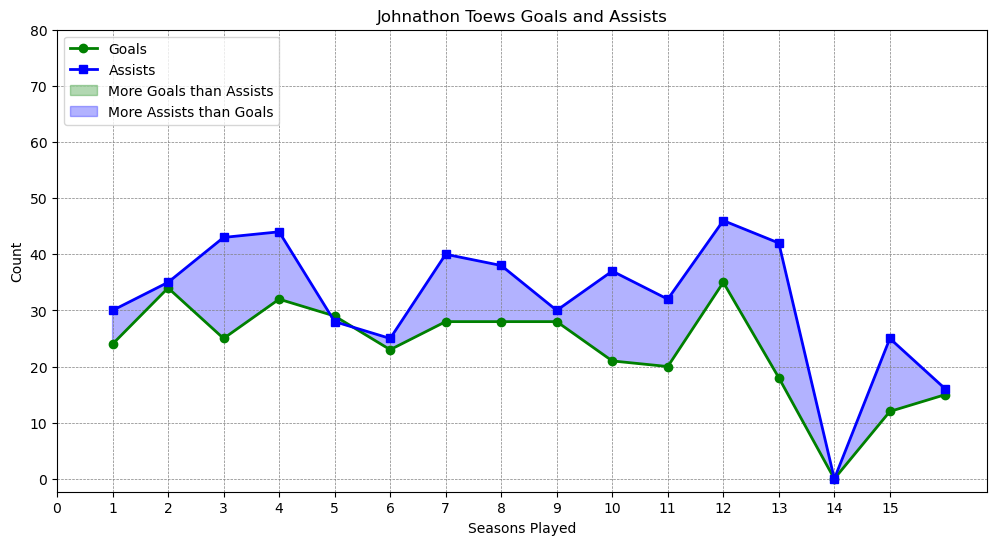

In [3231]:
# Johnathon Toews' goals and assists
johnathon_goals = draft_data[draft_data['playername'] == 'Jonathan Toews']['g']
johnathon_assists = draft_data[draft_data['playername'] == 'Jonathan Toews']['a']
johnathon_seasons = draft_data[draft_data['playername'] == 'Jonathan Toews']['season']
johnathon_seasons = johnathon_seasons.str.split('-').str[0].astype(int) - 2006
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(johnathon_seasons, johnathon_goals, 'g-o',  label='Goals', linewidth=2)
ax.plot(johnathon_seasons, johnathon_assists, 'b-s', label='Assists', linewidth=2)
ax.fill_between(johnathon_seasons, johnathon_goals, johnathon_assists, where=(johnathon_goals > johnathon_assists),
                interpolate=True, color='green', alpha=0.3, label='More Goals than Assists')
ax.fill_between(johnathon_seasons, johnathon_goals, johnathon_assists, where=(johnathon_goals < johnathon_assists),
                interpolate=True, color='blue', alpha=0.3, label='More Assists than Goals')
ax.set_title('Johnathon Toews Goals and Assists')
ax.set_xlabel('Seasons Played')
ax.set_ylabel('Count')
ax.legend(loc = 'upper left')
ax.grid(True, linestyle='--', linewidth=0.5, color='gray')
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.xticks(range(0, 16, 1))
plt.yticks(range(0, 90, 10))
plt.show()

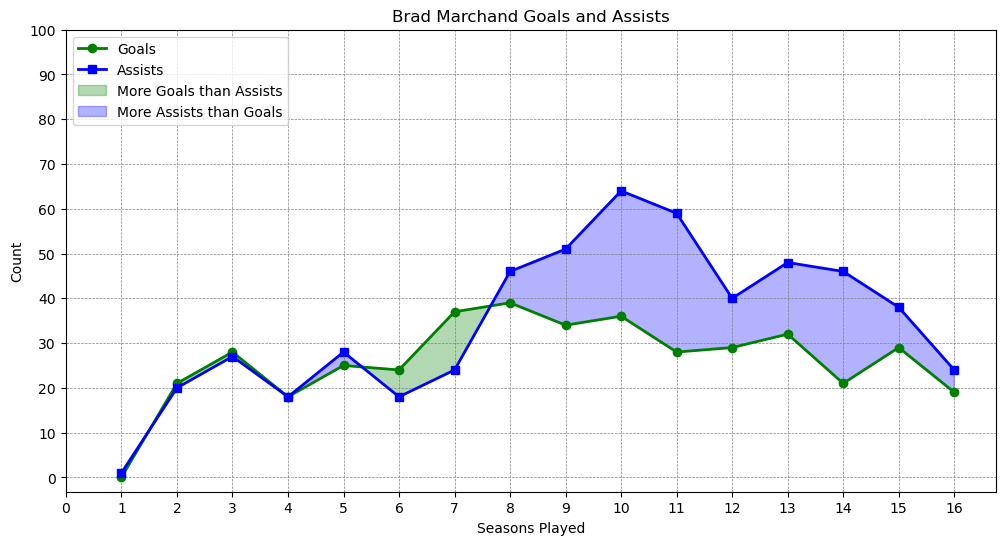

In [3232]:
# Brad Marchand's goals and assists
marchand_goals = draft_data[draft_data['playername'] == 'Brad Marchand']['g']
marchand_assists = draft_data[draft_data['playername'] == 'Brad Marchand']['a']
marchand_seasons = draft_data[draft_data['playername'] == 'Brad Marchand']['season']
marchand_seasons = marchand_seasons.str.split('-').str[0].astype(int) - 2008
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(marchand_seasons, marchand_goals, 'g-o', label='Goals', linewidth=2)
ax.plot(marchand_seasons, marchand_assists, 'b-s', label='Assists', linewidth=2)
ax.fill_between(marchand_seasons, marchand_goals, marchand_assists, where=(marchand_goals > marchand_assists),
                interpolate=True, color='green', alpha=0.3, label='More Goals than Assists')
ax.fill_between(marchand_seasons, marchand_goals, marchand_assists, where=(marchand_goals < marchand_assists),
                interpolate=True, color='blue', alpha=0.3, label='More Assists than Goals')
ax.set_title('Brad Marchand Goals and Assists')
ax.set_xlabel('Seasons Played')
ax.set_ylabel('Count')
ax.legend(loc = 'upper left')
ax.grid(True, linestyle='--', linewidth=0.5, color='gray')
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.xticks(range(0, 17, 1))
plt.yticks(range(0, 101, 10))
plt.show()

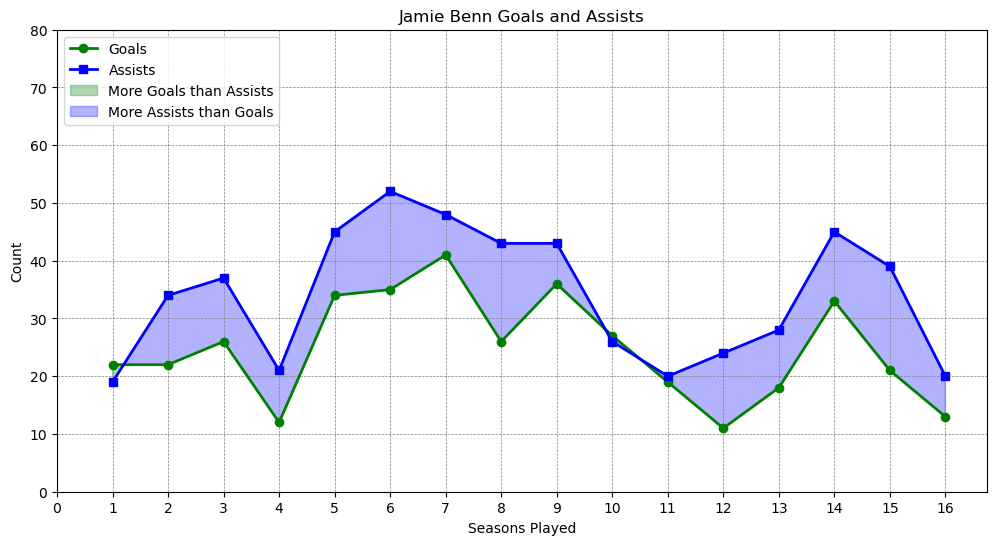

In [3233]:
# Jamie Benn goals and assists
benn_seasons = draft_data[draft_data['playername'] == 'Jamie Benn']['season']
benn_goals = draft_data[draft_data['playername'] == 'Jamie Benn']['g']
benn_assists = draft_data[draft_data['playername'] == 'Jamie Benn']['a']
benn_seasons = benn_seasons.str.split('-').str[0].astype(int)
benn_seasons = benn_seasons - 2008

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(benn_seasons, benn_goals, 'g-o', linewidth=2, label='Goals')
ax.plot(benn_seasons, benn_assists, 'b-s', linewidth=2, label='Assists')
ax.fill_between(benn_seasons, benn_goals, benn_assists, where=(benn_goals > benn_assists),
                interpolate=True, color='green', alpha=0.3, label='More Goals than Assists')
ax.fill_between(benn_seasons, benn_goals, benn_assists, where=(benn_goals < benn_assists),
                interpolate=True, color='blue', alpha=0.3, label='More Assists than Goals')
ax.set_title('Jamie Benn Goals and Assists')
ax.set_xlabel('Seasons Played')
ax.set_ylabel('Count')
ax.legend(loc = 'upper left')
ax.grid(True, linestyle='--', linewidth=0.5, color='gray')
ax.set_xticks(range(0, 17, 1))
ax.set_yticks(range(0,90,10))
plt.show()

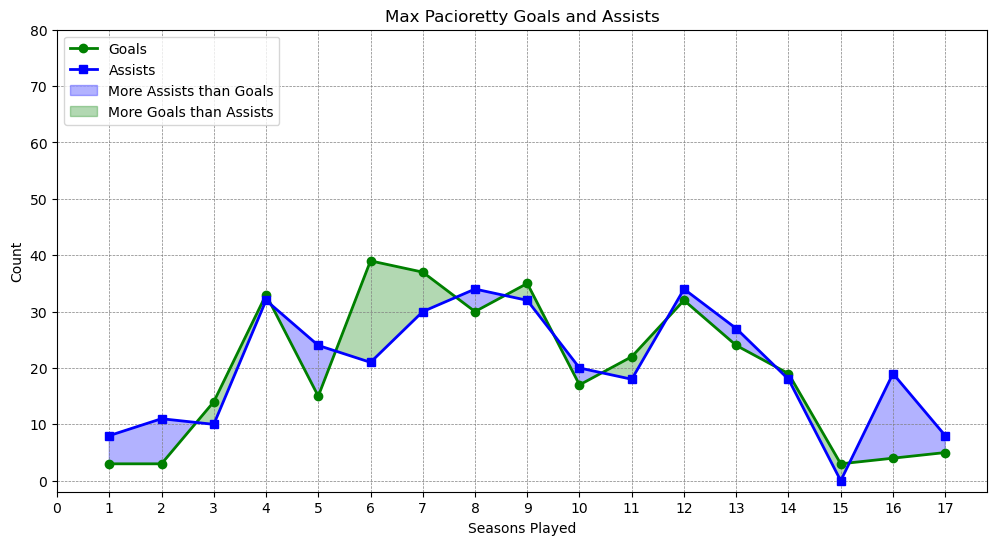

In [3234]:
# Max Pacioretty goals and assists
pacioretty_goals = draft_data[draft_data['playername'] == 'Max Pacioretty']['g']
pacioretty_assists = draft_data[draft_data['playername'] == 'Max Pacioretty']['a']
pacioretty_seasons = draft_data[draft_data['playername'] == 'Max Pacioretty']['season']
pacioretty_seasons = pacioretty_seasons.str.split('-').str[0].astype(int) - 2007

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(pacioretty_seasons, pacioretty_goals,'g-o',label='Goals', linewidth=2)
ax.plot(pacioretty_seasons, pacioretty_assists, 'b-s', label='Assists', linewidth=2)
ax.fill_between(pacioretty_seasons, pacioretty_goals, pacioretty_assists, where=(pacioretty_goals < pacioretty_assists),
                interpolate=True, color='blue', alpha=0.3, label='More Assists than Goals')
ax.fill_between(pacioretty_seasons, pacioretty_goals, pacioretty_assists, where=(pacioretty_goals > pacioretty_assists),
                interpolate=True, color='green', alpha=0.3, label='More Goals than Assists')
ax.set_title('Max Pacioretty Goals and Assists')
ax.set_xlabel('Seasons Played')
ax.set_ylabel('Count')
ax.legend(loc = 'upper left')
ax.grid(True, linestyle='--', linewidth=0.5, color='gray')
ax.set_xticks(range(0, 18, 1))
ax.set_yticks(range(0,90,10))
plt.show()

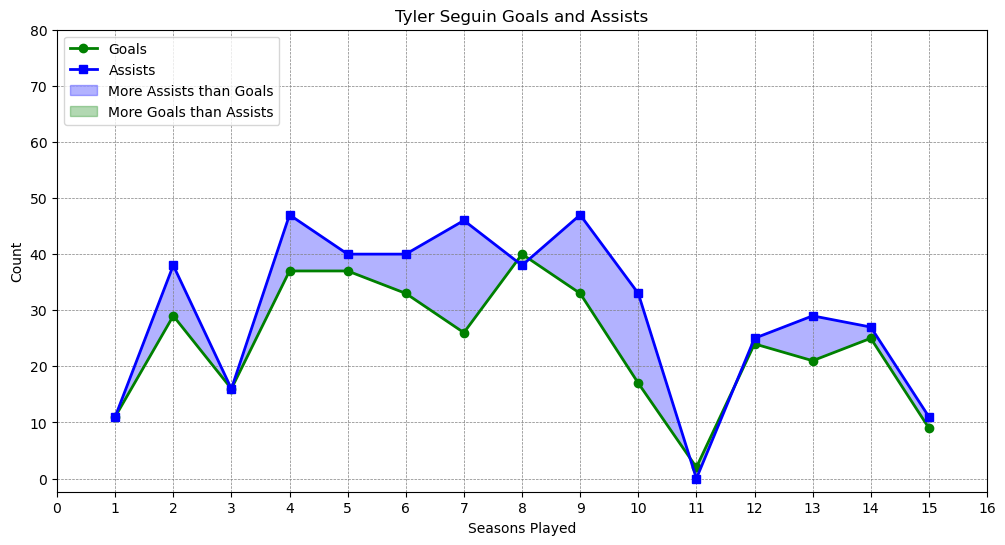

In [3235]:
# Tyler Seguin goals and assists
seguin_seasons = draft_data[draft_data['playername'] == 'Tyler Seguin']['season']
seguin_goals = draft_data[draft_data['playername'] == 'Tyler Seguin']['g']
seguin_assists = draft_data[draft_data['playername'] == 'Tyler Seguin']['a']
seguin_seasons = seguin_seasons.str.split('-').str[0].astype(int) - 2009

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(seguin_seasons, seguin_goals, 'g-o', label='Goals', linewidth=2)    
ax.plot(seguin_seasons, seguin_assists, 'b-s', label='Assists', linewidth=2)
ax.fill_between(seguin_seasons, seguin_goals, seguin_assists, where=(seguin_goals < seguin_assists),
                interpolate=True, color='blue', alpha=0.3, label='More Assists than Goals')
ax.fill_between(seguin_seasons, seguin_goals, seguin_assists, where=(seguin_goals > seguin_assists),
                interpolate=True, color='green', alpha=0.3, label='More Goals than Assists')
ax.set_title('Tyler Seguin Goals and Assists')
ax.set_xlabel('Seasons Played')
ax.set_ylabel('Count')
ax.legend(loc = 'upper left')
ax.grid(True, linestyle='--', linewidth=0.5, color='gray')
ax.set_xticks(range(0, 17, 1))
ax.set_yticks(range(0,90,10))
plt.show()

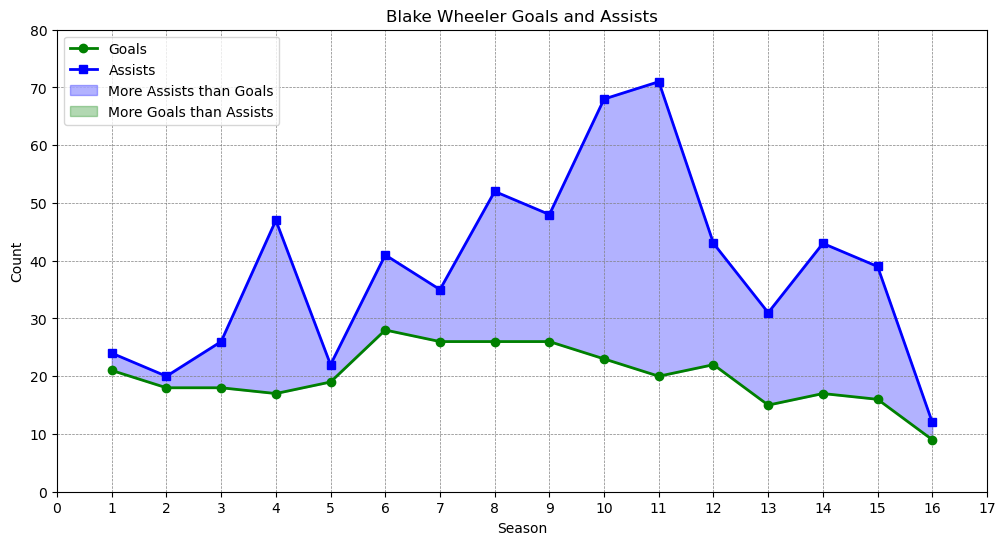

In [3236]:
# Blake Wheeler
wheeler_seasons = draft_data[draft_data['playername'] == 'Blake Wheeler']['season']
wheeler_goals = draft_data[draft_data['playername'] == 'Blake Wheeler']['g']
wheeler_assists = draft_data[draft_data['playername'] == 'Blake Wheeler']['a']
wheeler_seasons = wheeler_seasons.str.split('-').str[0].astype(int) - 2007

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(wheeler_seasons, wheeler_goals, 'g-o', label='Goals', linewidth=2)    
ax.plot(wheeler_seasons, wheeler_assists, 'b-s', label='Assists', linewidth=2)
ax.fill_between(wheeler_seasons, wheeler_goals, wheeler_assists, where=(wheeler_goals < wheeler_assists),
                interpolate=True, color='blue', alpha=0.3, label='More Assists than Goals')
ax.fill_between(wheeler_seasons, wheeler_goals, wheeler_assists, where=(wheeler_goals > wheeler_assists),
                interpolate=True, color='green', alpha=0.3, label='More Goals than Assists')
ax.set_xlabel('Season')
ax.set_ylabel('Count')
ax.set_xticks(range(0, 18, 1))
ax.set_yticks(range(0, 90, 10))
ax.grid(True, linestyle='--', linewidth=0.5, color='gray')
ax.set_title('Blake Wheeler Goals and Assists')
ax.legend(loc='upper left')
plt.show()

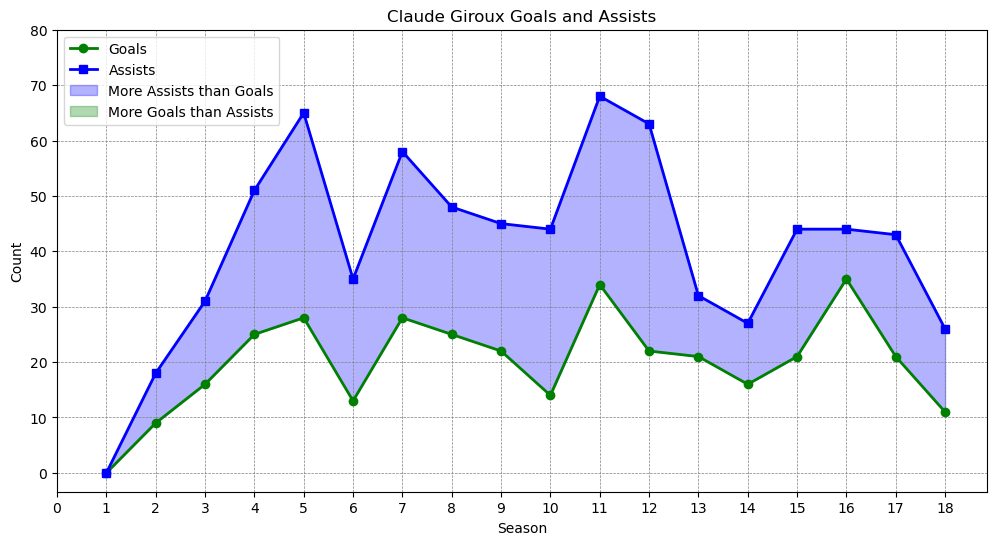

In [3237]:
# Claude Giroux goals and assists
giroux_seasons = draft_data[draft_data['playername'] == 'Claude Giroux']['season']
giroux_goals = draft_data[draft_data['playername'] == 'Claude Giroux']['g']
giroux_assists = draft_data[draft_data['playername'] == 'Claude Giroux']['a']
giroux_seasons = giroux_seasons.str.split('-').str[0].astype(int) - 2006

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(giroux_seasons, giroux_goals, 'g-o', label='Goals', linewidth=2)
ax.plot(giroux_seasons, giroux_assists, 'b-s', label='Assists', linewidth=2)
ax.fill_between(giroux_seasons, giroux_goals, giroux_assists, where=(giroux_goals < giroux_assists),
                interpolate=True, color='blue', alpha=0.3, label='More Assists than Goals')
ax.fill_between(giroux_seasons, giroux_goals, giroux_assists, where=(giroux_goals > giroux_assists),
                interpolate=True, color='green', alpha=0.3, label='More Goals than Assists')
ax.set_xlabel('Season')
ax.set_ylabel('Count')
ax.set_xticks(range(0, 19, 1))
ax.set_yticks(range(0, 90, 10))
ax.grid(True, linestyle='--', linewidth=0.5, color='gray')
ax.set_title('Claude Giroux Goals and Assists')
ax.legend(loc='upper left')
plt.show()

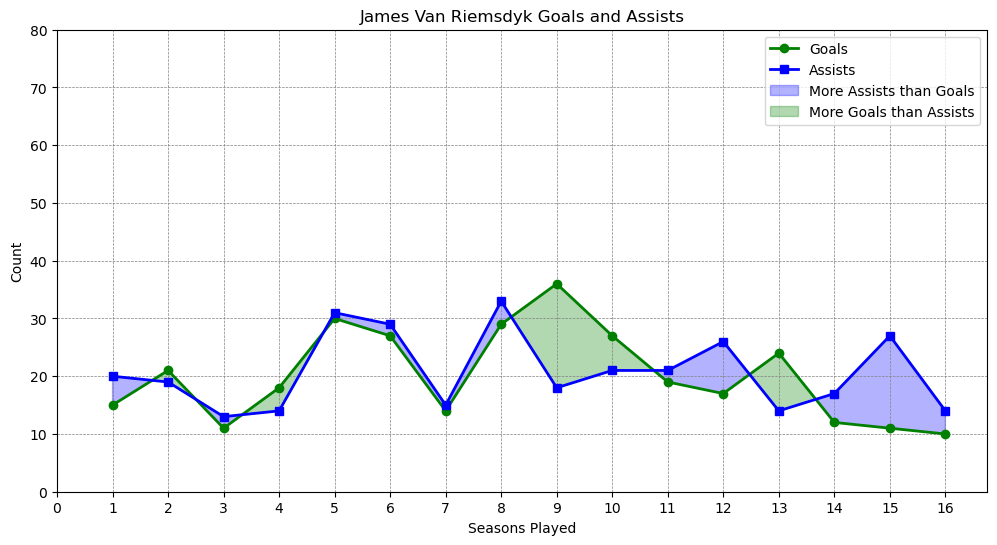

In [3238]:
# James Van Riemsdyk goals and assists
van_seasons = draft_data[draft_data['playername'] == 'James van Riemsdyk']['season']
van_goals = draft_data[draft_data['playername'] == 'James van Riemsdyk']['g']
van_assists = draft_data[draft_data['playername'] == 'James van Riemsdyk']['a']
van_seasons = van_seasons.str.split('-').str[0].astype(int) - 2008

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(van_seasons, van_goals, 'g-o', label='Goals', linewidth=2)
ax.plot(van_seasons, van_assists, 'b-s', label='Assists', linewidth=2)
ax.fill_between(van_seasons, van_goals, van_assists, where=(van_goals < van_assists),
                interpolate=True, color='blue', alpha=0.3, label='More Assists than Goals')
ax.fill_between(van_seasons, van_goals, van_assists, where=(van_goals > van_assists),
                interpolate=True, color='green', alpha=0.3, label='More Goals than Assists')
ax.set_xlabel('Seasons Played')
ax.set_ylabel('Count')
ax.set_title('James Van Riemsdyk Goals and Assists')
ax.grid(True, linestyle='--', linewidth=0.5, color='gray')
ax.set_xticks(range(0, 17, 1))
ax.set_yticks(range(0, 90, 10))
ax.legend()
plt.show()

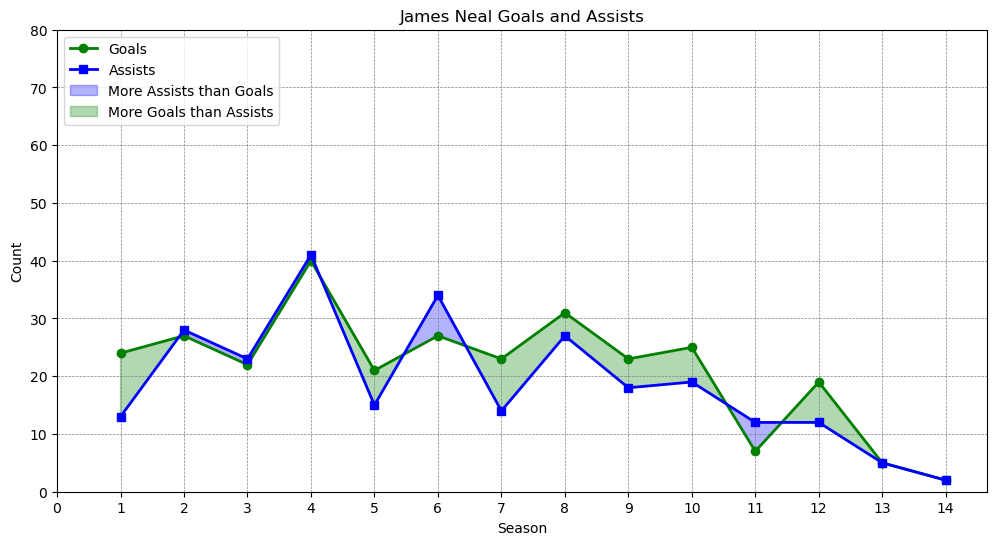

In [3239]:
# James Neal
neal_seasons = draft_data[draft_data['playername'] == 'James Neal']['season']
neal_goals = draft_data[draft_data['playername'] == 'James Neal']['g']
neal_assists = draft_data[draft_data['playername'] == 'James Neal']['a']
neal_seasons = neal_seasons.str.split('-').str[0].astype(int) - 2007

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(neal_seasons, neal_goals, 'g-o', label='Goals', linewidth=2)
ax.plot(neal_seasons, neal_assists, 'b-s', label='Assists', linewidth=2)
ax.fill_between(neal_seasons, neal_goals, neal_assists, where=(neal_goals < neal_assists),
                interpolate=True, color='blue', alpha=0.3, label='More Assists than Goals')
ax.fill_between(neal_seasons, neal_goals, neal_assists, where=(neal_goals > neal_assists),
                interpolate=True, color='green', alpha=0.3, label='More Goals than Assists')
ax.set_xlabel('Season')
ax.set_ylabel('Count')
ax.set_xticks(range(0, 15, 1))
ax.set_yticks(range(0, 90, 10))
ax.grid(True, linestyle='--', linewidth=0.5, color='gray')
ax.set_title('James Neal Goals and Assists')
ax.legend(loc='upper left')
plt.show()

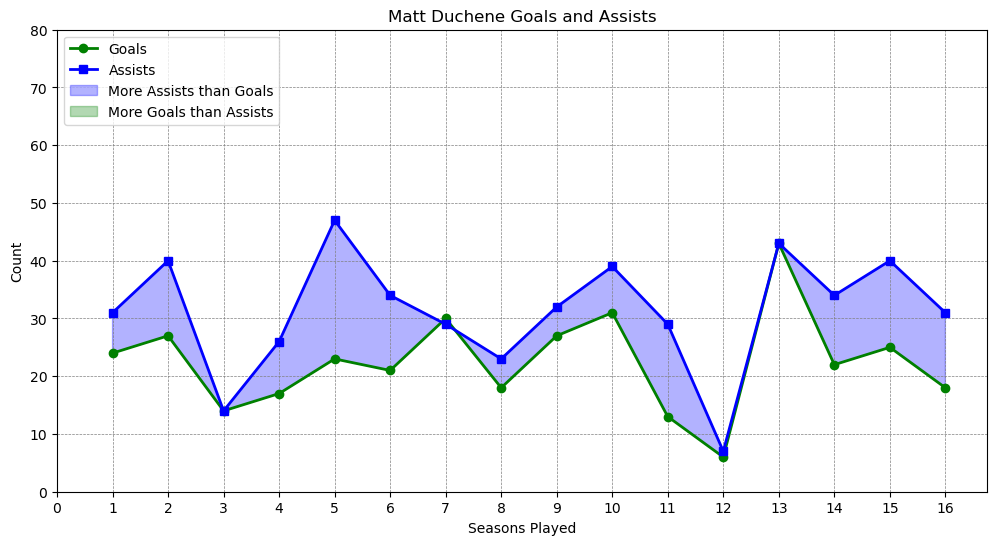

In [3240]:
# Matt Duchene
duchene_seasons = draft_data[draft_data['playername'] == 'Matt Duchene']['season']
duchene_goals = draft_data[draft_data['playername'] == 'Matt Duchene']['g']
duchene_assists = draft_data[draft_data['playername'] == 'Matt Duchene']['a']
duchene_seasons = duchene_seasons.str.split('-').str[0].astype(int) - 2008

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(duchene_seasons, duchene_goals, 'g-o', label='Goals', linewidth=2)
ax.plot(duchene_seasons, duchene_assists, 'b-s', label='Assists', linewidth=2)
ax.fill_between(duchene_seasons, duchene_goals, duchene_assists, where=(duchene_goals < duchene_assists),
                interpolate=True, color='blue', alpha=0.3, label='More Assists than Goals')
ax.fill_between(duchene_seasons, duchene_goals, duchene_assists, where=(duchene_goals > duchene_assists),
                interpolate=True, color='green', alpha=0.3, label='More Goals than Assists')
ax.set_xlabel('Seasons Played')
ax.set_ylabel('Count')
ax.set_xticks(range(0, 17, 1))
ax.set_yticks(range(0, 90, 10))
ax.set_title('Matt Duchene Goals and Assists')
ax.grid(True, linestyle='--', linewidth=0.5, color='gray')
ax.legend(loc = 'upper left')
plt.show()

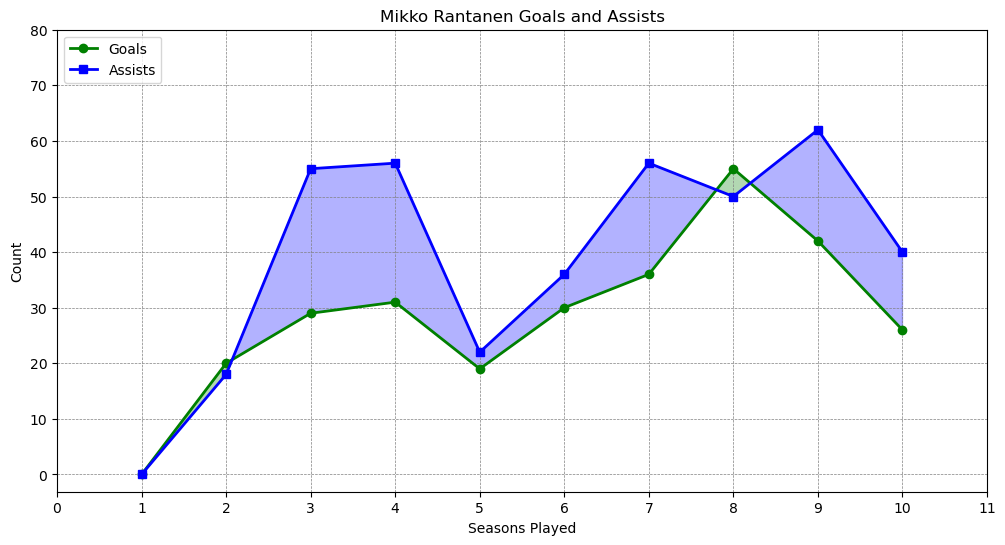

In [3241]:
# Mikko Rantanen goals and assists
rantanen_seasons = draft_data[draft_data['playername'] == 'Mikko Rantanen']['season']
rantanen_goals = draft_data[draft_data['playername'] == 'Mikko Rantanen']['g']
rantanen_assists = draft_data[draft_data['playername'] == 'Mikko Rantanen']['a']
rantanen_seasons = rantanen_seasons.str.split('-').str[0].astype(int) - 2014
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(rantanen_seasons, rantanen_goals, 'g-o', label='Goals', linewidth=2)
ax.plot(rantanen_seasons, rantanen_assists, 'b-s', label='Assists', linewidth=2)
ax.fill_between(rantanen_seasons, rantanen_goals, rantanen_assists, where=(rantanen_goals < rantanen_assists),
                interpolate=True, color='blue', alpha=0.3)
ax.fill_between(rantanen_seasons, rantanen_goals, rantanen_assists, where=(rantanen_goals > rantanen_assists),
                interpolate=True, color='green', alpha=0.3)
ax.set_xticks(range(0, 12, 1))
ax.set_yticks(range(0, 90, 10))
ax.set_xlabel('Seasons Played')
ax.set_ylabel('Count')
ax.set_title('Mikko Rantanen Goals and Assists')
ax.legend(loc = 'upper left')
ax.grid(True, color='gray', linestyle='--', linewidth=0.5)
plt.show()

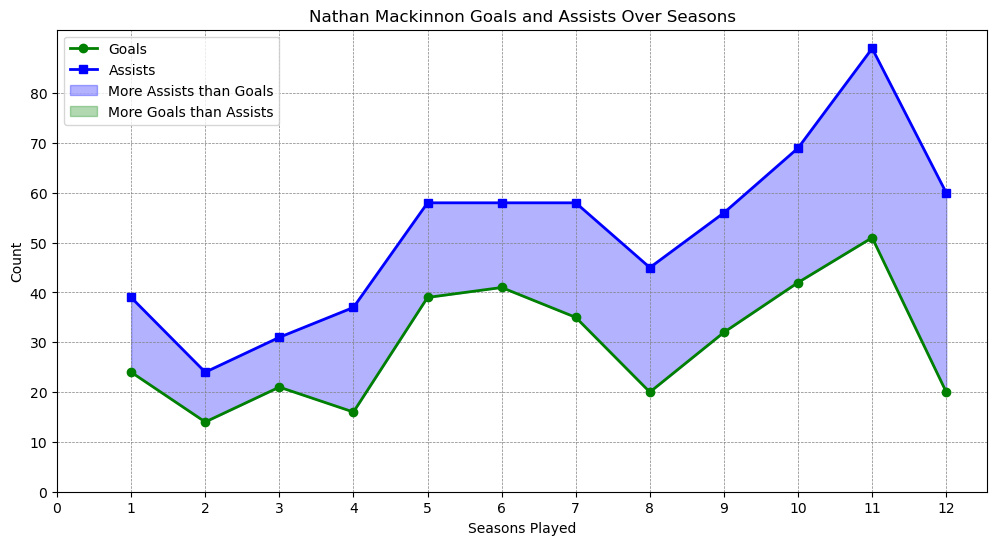

In [3242]:
# Nathan Makinnon goals and assists
makinnon_seasons = draft_data[draft_data['playername'] == 'Nathan MacKinnon']['season']
makinnon_goals = draft_data[draft_data['playername'] == 'Nathan MacKinnon']['g']
makinnon_assists = draft_data[draft_data['playername'] == 'Nathan MacKinnon']['a']
makinnon_seasons = makinnon_seasons.str.split('-').str[0].astype(int) - 2012

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(makinnon_seasons, makinnon_goals, 'g-o', label='Goals', linewidth=2)
ax.plot(makinnon_seasons, makinnon_assists, 'b-s', label='Assists', linewidth=2)
ax.fill_between(makinnon_seasons, makinnon_goals, makinnon_assists, where=(makinnon_goals < makinnon_assists),
                interpolate=True, color='blue', alpha=0.3, label='More Assists than Goals')
ax.fill_between(makinnon_seasons, makinnon_goals, makinnon_assists, where=(makinnon_goals > makinnon_assists),
                interpolate=True, color='green', alpha=0.3, label='More Goals than Assists')
ax.set_xlabel('Seasons Played')
ax.set_ylabel('Count')
ax.set_title('Nathan Mackinnon Goals and Assists Over Seasons')
ax.grid(True, linestyle='--', linewidth=0.5, color='gray')
ax.set_xticks(range(0, 13, 1))
ax.set_yticks(range(0, 90, 10))
ax.legend()
plt.show()

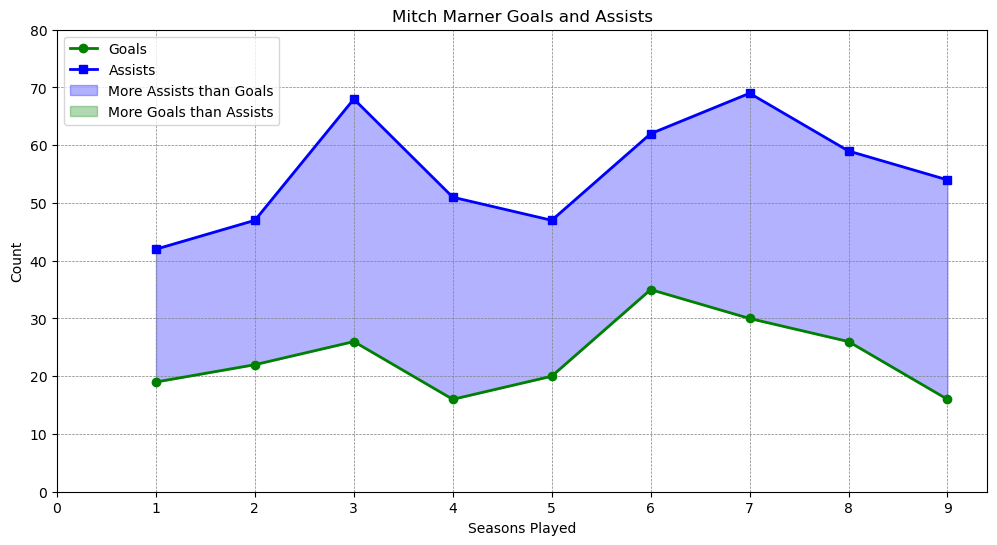

In [3243]:
# Mitch Marner goals and assists
marner_seasons = draft_data[draft_data['playername'] == 'Mitchell Marner']['season']
marner_goals = draft_data[draft_data['playername'] == 'Mitchell Marner']['g']
marner_assists = draft_data[draft_data['playername'] == 'Mitchell Marner']['a']
marner_seasons = marner_seasons.str.split('-').str[0].astype(int) - 2015

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(marner_seasons, marner_goals, 'g-o', label='Goals', linewidth=2)
ax.plot(marner_seasons, marner_assists, 'b-s', label='Assists', linewidth=2)
ax.fill_between(marner_seasons, marner_goals, marner_assists, where=(marner_goals < marner_assists), color='blue', alpha=0.3, label='More Assists than Goals')        
ax.fill_between(marner_seasons, marner_goals, marner_assists, where=(marner_goals > marner_assists), color='green', alpha=0.3, label='More Goals than Assists')
ax.set_xlabel('Seasons Played')
ax.set_ylabel('Count')
ax.set_title('Mitch Marner Goals and Assists')
ax.legend(loc = 'upper left')
ax.grid(True, color='gray', linestyle='--', linewidth=0.5)
ax.set_xticks(range(0, 10, 1))
ax.set_yticks(range(0, 90, 10))
plt.show()

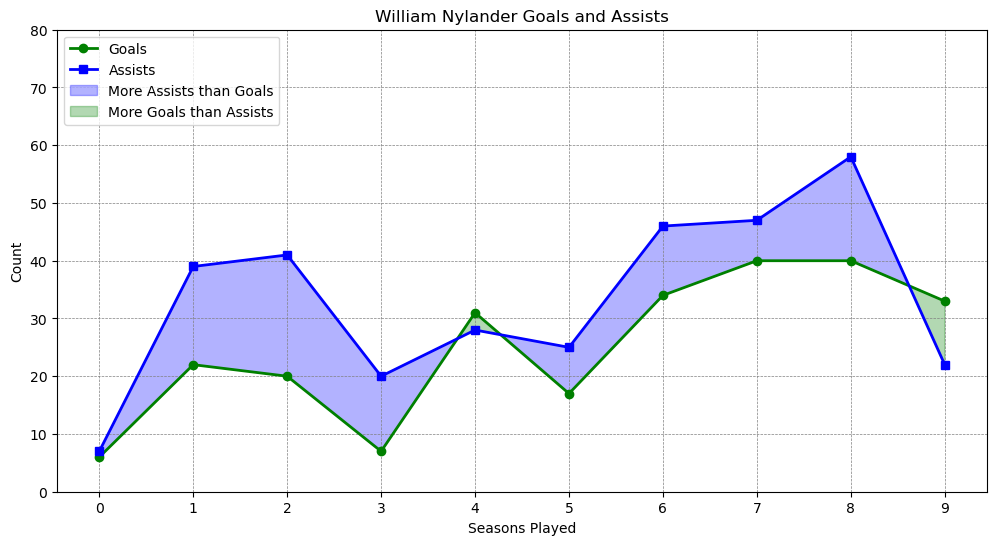

In [3244]:
# William Nylander goals and assists
nylander_seasons = draft_data[draft_data['playername'] == 'William Nylander']['season']
nylander_goals = draft_data[draft_data['playername'] == 'William Nylander']['g']
nylander_assists = draft_data[draft_data['playername'] == 'William Nylander']['a']
nylander_seasons = nylander_seasons.str.split('-').str[0].astype(int) - 2015

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(nylander_seasons, nylander_goals, 'g-o', label='Goals', linewidth=2)
ax.plot(nylander_seasons, nylander_assists, 'b-s', label='Assists', linewidth=2)
ax.fill_between(nylander_seasons, nylander_goals, nylander_assists, where=(nylander_goals < nylander_assists),
                interpolate=True, color='blue', alpha=0.3, label='More Assists than Goals')
ax.fill_between(nylander_seasons, nylander_goals, nylander_assists, where=(nylander_goals > nylander_assists),
                interpolate=True, color='green', alpha=0.3, label='More Goals than Assists')
ax.set_xlabel('Seasons Played')
ax.set_ylabel('Count')
ax.set_title('William Nylander Goals and Assists')
ax.legend(loc = 'upper left')
ax.grid(True, linestyle='--', linewidth=0.5, color='gray')
ax.set_xticks(range(0, 10, 1))
ax.set_yticks(range(0, 90, 10))
plt.show()

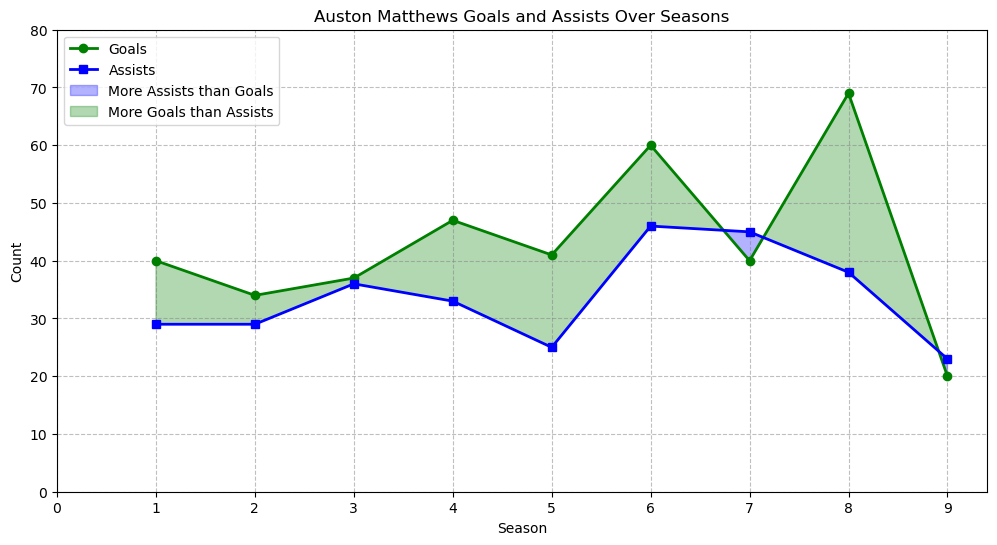

In [3245]:
# Auston Matthews goals and assists
matthews_seasons = draft_data[draft_data['playername'] == 'Auston Matthews']['season']
matthews_goals = draft_data[draft_data['playername'] == 'Auston Matthews']['g']
matthews_assists = draft_data[draft_data['playername'] == 'Auston Matthews']['a']
matthews_seasons = matthews_seasons.str.split('-').str[0].astype(int) - 2015

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(matthews_seasons, matthews_goals, 'g-o', label='Goals', linewidth=2)
ax.plot(matthews_seasons, matthews_assists, 'b-s', label='Assists', linewidth=2)
ax.fill_between(matthews_seasons, matthews_goals, matthews_assists, where=(matthews_goals < matthews_assists),
                interpolate=True, color='blue', alpha=0.3, label='More Assists than Goals')
ax.fill_between(matthews_seasons, matthews_goals, matthews_assists, where=(matthews_goals > matthews_assists),
                interpolate=True, color='green', alpha=0.3, label='More Goals than Assists')
ax.set_xlabel('Season')
ax.set_ylabel('Count')
ax.set_title('Auston Matthews Goals and Assists Over Seasons')
ax.legend(loc='upper left')
ax.grid(True, linestyle='--', alpha=0.5, color='gray')
ax.set_xticks(range(0, 10, 1))
ax.set_yticks(range(0, 90, 10))
plt.show()

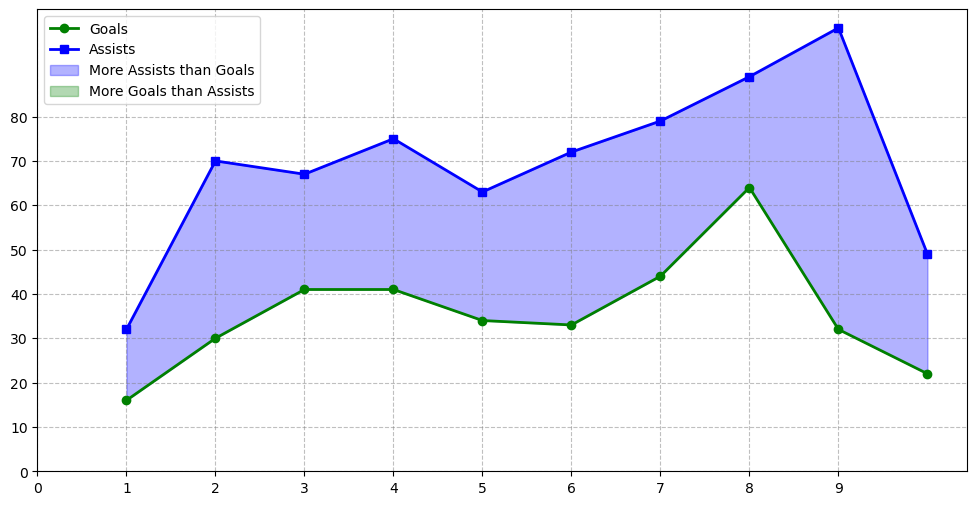

In [3246]:
# Connor McDavid goals and assists
mcdavid_seasons = draft_data[draft_data['playername'] == 'Connor McDavid']['season']
mcdavid_goals = draft_data[draft_data['playername'] == 'Connor McDavid']['g']
mcdavid_assists = draft_data[draft_data['playername'] == 'Connor McDavid']['a']
mcdavid_seasons = mcdavid_seasons.str.split('-').str[0].astype(int) - 2014
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(mcdavid_seasons, mcdavid_goals, 'g-o', label='Goals', linewidth=2)
ax.plot(mcdavid_seasons, mcdavid_assists, 'b-s', label='Assists', linewidth=2)
ax.fill_between(mcdavid_seasons, mcdavid_goals, mcdavid_assists, where=(mcdavid_goals < mcdavid_assists),
                interpolate=True, color='blue', alpha=0.3, label='More Assists than Goals')
ax.fill_between(mcdavid_seasons, mcdavid_goals, mcdavid_assists, where=(mcdavid_goals > mcdavid_assists),
                interpolate=True, color='green', alpha=0.3, label='More Goals than Assists')
ax.legend(loc='upper left')
ax.grid(True, linestyle='--', alpha=0.5, color='gray')
ax.set_xticks(range(0, 10, 1))
ax.set_yticks(range(0, 90, 10))
plt.show()

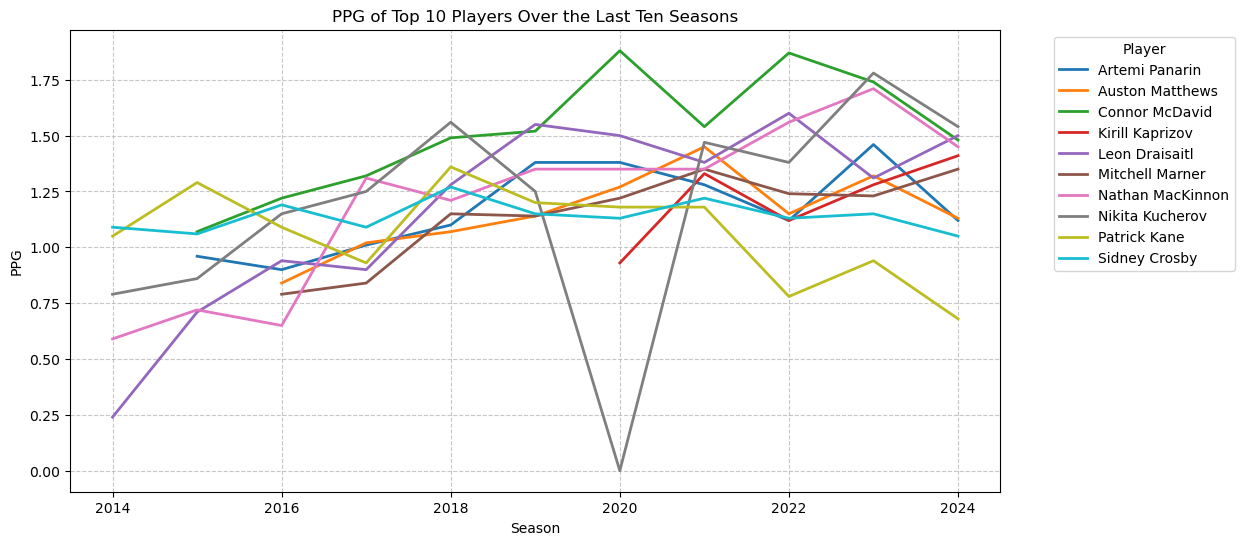

In [3247]:
## Using the PPG column data and multiple seasons data, create a new data subset that 
# includes the ten players with the highest average PPG over the last ten seasons
# (2014-2024). Create a lineplot that shows the PPG of these ten players over the last
# ten seasons. Make sure to include a legend and a title.
draft_data['season'] = draft_data['season'].str[:4].astype(int)
# Acquiring recent data for this question
recent_data = draft_data[(draft_data['season'] >= 2014) & (draft_data['season'] <= 2024)]
# Top 10 players with the highest average PPG over the last ten seasons
top_10_players = recent_data.groupby('playername')['ppg'].mean().nlargest(10).index
# Filter for only those ten players
top_10_data = recent_data[recent_data['playername'].isin(top_10_players)]
# Pivot for plotting
ppg_pivot = top_10_data.pivot(index='season', columns='playername', values='ppg')
# Create a lineplot that shows the PPG of these ten players over the last ten seasons
fig, ax = plt.subplots(figsize=(12, 6))  # Create a figure and an axes.
ppg_pivot.plot(ax=ax, linewidth=2)  # Plot some data on the axes.
ax.set_xlabel('Season')  # Add an x-label to the axes.
ax.set_ylabel('PPG')  # Add a y-label to the axes.
ax.set_title('PPG of Top 10 Players Over the Last Ten Seasons')  # Add a title to the axes.
ax.legend(title='Player', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [3248]:
ppg_full_table = top_10_data[['playername', 'season', 'ppg']]
ppg_full_table = ppg_full_table.sort_values(by=['playername', 'season'])
print(ppg_full_table.to_string(index=False))


      playername  season  ppg
  Artemi Panarin    2015 0.96
  Artemi Panarin    2016 0.90
  Artemi Panarin    2017 1.01
  Artemi Panarin    2018 1.10
  Artemi Panarin    2019 1.38
  Artemi Panarin    2020 1.38
  Artemi Panarin    2021 1.28
  Artemi Panarin    2022 1.12
  Artemi Panarin    2023 1.46
  Artemi Panarin    2024 1.12
 Auston Matthews    2016 0.84
 Auston Matthews    2017 1.02
 Auston Matthews    2018 1.07
 Auston Matthews    2019 1.14
 Auston Matthews    2020 1.27
 Auston Matthews    2021 1.45
 Auston Matthews    2022 1.15
 Auston Matthews    2023 1.32
 Auston Matthews    2024 1.13
  Connor McDavid    2015 1.07
  Connor McDavid    2016 1.22
  Connor McDavid    2017 1.32
  Connor McDavid    2018 1.49
  Connor McDavid    2019 1.52
  Connor McDavid    2020 1.88
  Connor McDavid    2021 1.54
  Connor McDavid    2022 1.87
  Connor McDavid    2023 1.74
  Connor McDavid    2024 1.48
 Kirill Kaprizov    2020 0.93
 Kirill Kaprizov    2021 1.33
 Kirill Kaprizov    2022 1.12
 Kirill Ka

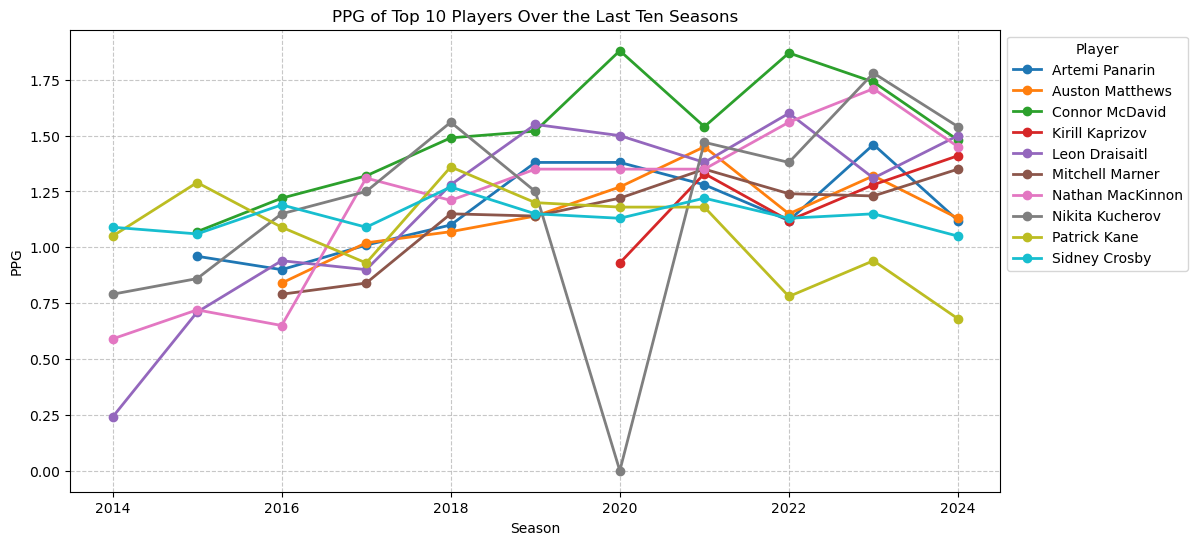

<Figure size 640x480 with 0 Axes>

In [3249]:
fig, ax = plt.subplots(figsize=(12, 6))
for player in ppg_pivot.columns:
    ax.plot(ppg_pivot.index, ppg_pivot[player], marker='o', linewidth=2, label=player)

ax.set_xlabel('Season')  # Add an x-label to the axes.
ax.set_ylabel('PPG')  # Add a y-label to the axes.
ax.set_title('PPG of Top 10 Players Over the Last Ten Seasons')  # Add a title to the axes.
ax.legend(title='Player', bbox_to_anchor=(1, 1), loc='upper left')
ax.grid(True, linestyle='--', alpha=0.7)


plt.show()
plt.subplots_adjust(bottom=0.1)
plt.show()

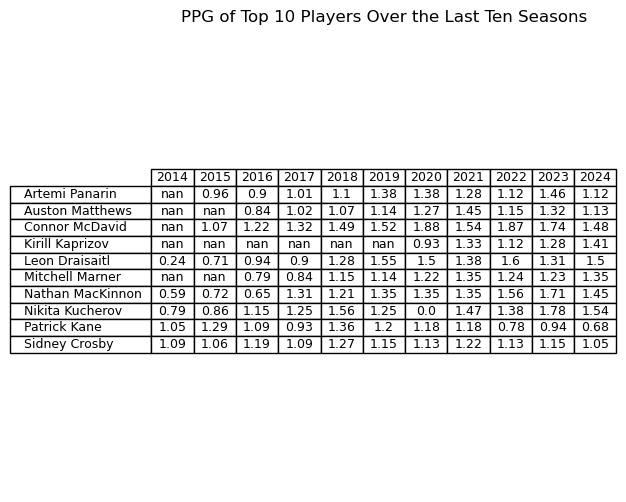

In [3250]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.axis('tight')
ax.axis('off')
ppg_pivot_two = ppg_full_table.pivot(index='playername', columns='season', values='ppg')
table = ax.table(cellText=ppg_pivot_two.values, colLabels=ppg_pivot_two.columns, rowLabels=ppg_pivot_two.index, cellLoc= 'center', loc='center')

plt.title('PPG of Top 10 Players Over the Last Ten Seasons')
plt.tight_layout
plt.show()

